In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cardio_vascular_data.csv")
#df = pd.read_csv(
#  "/content/drive/MyDrive/cardio_train_proper.csv",
#   sep=";"
#)
#there is an extra step i did outside, the original data wasnt in normal format suitable for data frame, it was separated with semi colo
#so i had to transform it first to be separated with , to be able to convert it into this data frame shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()
df.describe()
#im just checking the data types and shapes of my data here before i start cleaning them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19473.221214,1.349571,164.359229,74.259519,129.863371,97.722271,1.452057,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2506.426378,0.476838,8.210126,14.795654,158.964080,192.965722,0.719679,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10673.000000,1.000000,55.000000,10.300000,-158.000000,-73.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17732.000000,1.000000,159.000000,64.200000,114.000000,76.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19699.000000,1.000000,165.000000,72.000000,125.000000,83.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21436.000000,2.000000,170.000000,82.300000,142.000000,87.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,24037.000000,2.000000,250.000000,204.500000,16772.000000,11525.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


as we see the data contain alot of misleading data like negative bp and misleading heights like 50 cm and strange things
so it needs alot of cleaning and transformation to be ready for the model actaully lets see how is the data formed in the data frame

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18184,2,168,60.0,107,77,1,1,0,0,1,0
1,1,20288,1,156,86.2,147,96,3,1,0,0,1,1
2,2,19134,1,165,65.8,139,73,3,1,0,0,0,1
3,3,17635,2,169,82.9,159,105,3,1,0,0,1,1
4,4,17255,1,156,55.9,96,58,1,1,0,0,0,0


In [ ]:
df[(df['ap_lo'] > 300)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17584,2,183,100.0,171,1153,1,2,1,0,1,1
241,334,22099,2,157,62.4,168,1066,2,1,0,0,0,1
260,357,18278,1,150,84.5,150,849,1,1,0,0,1,1
329,458,23578,1,176,64.8,169,1059,2,2,0,0,0,1
345,482,18907,1,154,83.8,149,1062,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23545,1,167,82.1,169,1044,3,1,0,0,1,1
69872,99798,21895,1,152,56.2,169,1068,1,1,0,0,1,1
69878,99807,21269,2,168,96.5,168,1056,1,1,0,0,1,1
69885,99816,22088,2,166,75.4,163,963,1,1,0,0,0,0


#For the variables/columns of your dataset, mention which ones are quantitative and which ones are categorical.

The **quantative** data in our data set are:

1.   age  
2.   height
3.   weight
4.   ap_hi  (this represents the systolic bp)
5.   ap_lo  (this represents the diastolic bp)

The rest are **categorical** like:

1. gender
2. cholestorel level
3. gluc
4. smoking
5. active
6. alchol




our binary target in this data is the cardio feature which represent if the person has cardiovascular disease or not

In [ ]:
df[(df['ap_lo'] > 300)]['ap_lo'].size #there is 953 row with this condition

953

In [ ]:
df[df['ap_hi'] > 300]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,14936,1,160,59.8,850,58,1,1,0,0,1,0
2014,2845,22554,2,167,58.0,868,0,1,1,0,0,1,0
4817,6822,14305,1,168,62.4,868,57,2,1,0,0,1,0
7763,11089,21053,1,175,80.5,12072,94,1,1,0,0,1,1
8915,12710,18967,1,164,76.8,1497,84,2,1,0,0,1,1
9557,13616,22911,1,155,89.2,748,116,1,1,0,0,1,1
13895,19827,16080,1,168,72.5,1580,85,2,1,0,0,1,1
17713,25314,22692,2,163,51.8,944,73,3,3,0,0,1,1
23867,34120,16163,1,161,94.6,948,0,2,1,0,0,1,1
25464,36339,15912,2,169,76.8,14608,86,2,1,0,0,1,1


In [ ]:
df[df['ap_hi'] > 300]['ap_hi'].size
#there is 40 rows with these condition

39

In [ ]:
#as we the age here is in days, so i will convert it to years first
df['age'] = df['age'] / 365.25

In [ ]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,49.785079,2,168,60.0,107,77,1,1,0,0,1,0
1,1,55.545517,1,156,86.2,147,96,3,1,0,0,1,1
2,2,52.386037,1,165,65.8,139,73,3,1,0,0,0,1
3,3,48.281999,2,169,82.9,159,105,3,1,0,0,1,1
4,4,47.241615,1,156,55.9,96,58,1,1,0,0,0,0


i will check first the weight and height to see if there is impossible values in them a good way to be able to remove all the weird values is by calculating something like the bmi which will tell me directly if someone's weight is not meaningful to his height or physiologically impossible

As the data here does not contain any infants so its also impossible for someone to be 60 years for example and weights 60 kg and his height is 70 cm

So bmi i think is a good practise here

In [ ]:
df['bmi'] = df['weight'] / ((df['height']/100)**2) # since height is in cm needed to convert it into meter to match the bmi rule

In [ ]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,49.785079,2,168,60.0,107,77,1,1,0,0,1,0,21.258503
1,1,55.545517,1,156,86.2,147,96,3,1,0,0,1,1,35.420776
2,2,52.386037,1,165,65.8,139,73,3,1,0,0,0,1,24.168962
3,3,48.281999,2,169,82.9,159,105,3,1,0,0,1,1,29.025594
4,4,47.241615,1,156,55.9,96,58,1,1,0,0,0,0,22.970085
5,8,59.452430,1,151,64.7,114,76,2,2,0,0,0,0,28.375948
6,9,60.407940,1,157,89.9,123,75,3,1,0,0,1,0,36.472068
7,12,62.297057,2,178,97.4,138,96,3,3,0,0,1,1,30.741068
8,13,47.846680,1,158,70.3,104,67,1,1,0,0,1,0,28.160551
9,14,53.801506,1,164,65.7,104,58,1,1,0,0,0,0,24.427424


In [ ]:
#i will check now what is the normal range for bmi in people to remove the physiologically impossible values
clean_bmi_data = df[(df['bmi'] >= 12) & (df['bmi'] <= 70)]

In [ ]:
clean_weight_height_data = clean_bmi_data[(((clean_bmi_data['weight'] >= 30)&(clean_bmi_data['weight'] <= 180)) & ((clean_bmi_data['height'] >= 135)&(clean_bmi_data['height'] <= 210)))]

I applied here a physiological filter on the weight and height to remove the physiologically impossible values so when i then apply my outlier method it works effectively

In [ ]:
clean_weight_height_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,49.785079,2,168,60.0,107,77,1,1,0,0,1,0,21.258503
1,1,55.545517,1,156,86.2,147,96,3,1,0,0,1,1,35.420776
2,2,52.386037,1,165,65.8,139,73,3,1,0,0,0,1,24.168962
3,3,48.281999,2,169,82.9,159,105,3,1,0,0,1,1,29.025594
4,4,47.241615,1,156,55.9,96,58,1,1,0,0,0,0,22.970085


#  Use any statistical method to remove outliers from the data, if existing

below here i implemented two methods to remove outliers, z-score method and interquartile method, but the results of the interquartile was better than the z score method so i saved the interquartile cleaned data

#Apply only one of those cells!
these are different methods of removing outliers so dont apply both as it will override the one before it

In [ ]:
#i need now to apply a statistical method to remove the outliers in ap_lo and ap_hi as they contain impossible values or typos
#i will use the z score method as this is the gold standard in removing outliers as any thing that falls 3 st deviations away from the mean is considered an outlier
copy_of_bmi_df = clean_weight_height_data.copy()
cleaned_negative_bp = copy_of_bmi_df[(copy_of_bmi_df['ap_lo'] <= 350)&(copy_of_bmi_df['ap_lo'] >= 0)& ((copy_of_bmi_df['ap_hi'] <= 350  )& (copy_of_bmi_df['ap_hi']<=400)&(copy_of_bmi_df['ap_hi'] >= 0))]
df_statistical_clean = cleaned_negative_bp.copy()
#i will identify quantitative coloumns as required in the statement
quantitative_cols = ['age','ap_hi','ap_lo','bmi']

for col in quantitative_cols:
  mu = df_statistical_clean[col].mean()
  sigma = df_statistical_clean[col].std()
  df_statistical_clean = df_statistical_clean[((df_statistical_clean[col]-mu)/sigma).abs() <= 3]
#now i check how many rows were removed from the data in total
print(f"data before z-score cleaning: {len(clean_bmi_data)}")
print(f"data after z-score cleaning: {len(df_statistical_clean)}")

data before z-score cleaning: 69956
data after z-score cleaning: 67174


In [ ]:
#this is an alternative cell that uses interquartile method to remove outliers, im going to apply it to compare and see which method is better
copy_of_bmi_df = clean_weight_height_data.copy()
cleaned_negative_bp = copy_of_bmi_df[(copy_of_bmi_df['ap_lo'] <= 350)&(copy_of_bmi_df['ap_lo'] >= 0)& ((copy_of_bmi_df['ap_hi'] <= 350  )& (copy_of_bmi_df['ap_hi']<=400)&(copy_of_bmi_df['ap_hi'] >= 0))]
df_statistical_clean = cleaned_negative_bp.copy()
#i will identify quantitative coloumns as required in the statement
quantitative_cols = ['age','ap_hi','ap_lo','bmi']

for col in quantitative_cols:
 Q1 = df_statistical_clean[col].quantile(0.25)
 Q3 = df_statistical_clean[col].quantile(0.75)
 IQR =Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 df_statistical_clean = df_statistical_clean[df_statistical_clean[col].between(lower_bound, upper_bound)]
#now i check how many rows were removed from the data in total
print(f"data before IQR cleaning: {len(clean_bmi_data)}")
print(f"data after IQR cleaning: {len(df_statistical_clean)}")

data before IQR cleaning: 69956
data after IQR cleaning: 60073


In [ ]:
df_statistical_clean.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,49.785079,2,168,60.0,107,77,1,1,0,0,1,0,21.258503
1,1,55.545517,1,156,86.2,147,96,3,1,0,0,1,1,35.420776
2,2,52.386037,1,165,65.8,139,73,3,1,0,0,0,1,24.168962
5,8,59.452430,1,151,64.7,114,76,2,2,0,0,0,0,28.375948
6,9,60.407940,1,157,89.9,123,75,3,1,0,0,1,0,36.472068


In [ ]:
df_statistical_clean[df_statistical_clean['ap_lo'] > 200]
df_statistical_clean[df_statistical_clean['ap_hi'] > 200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


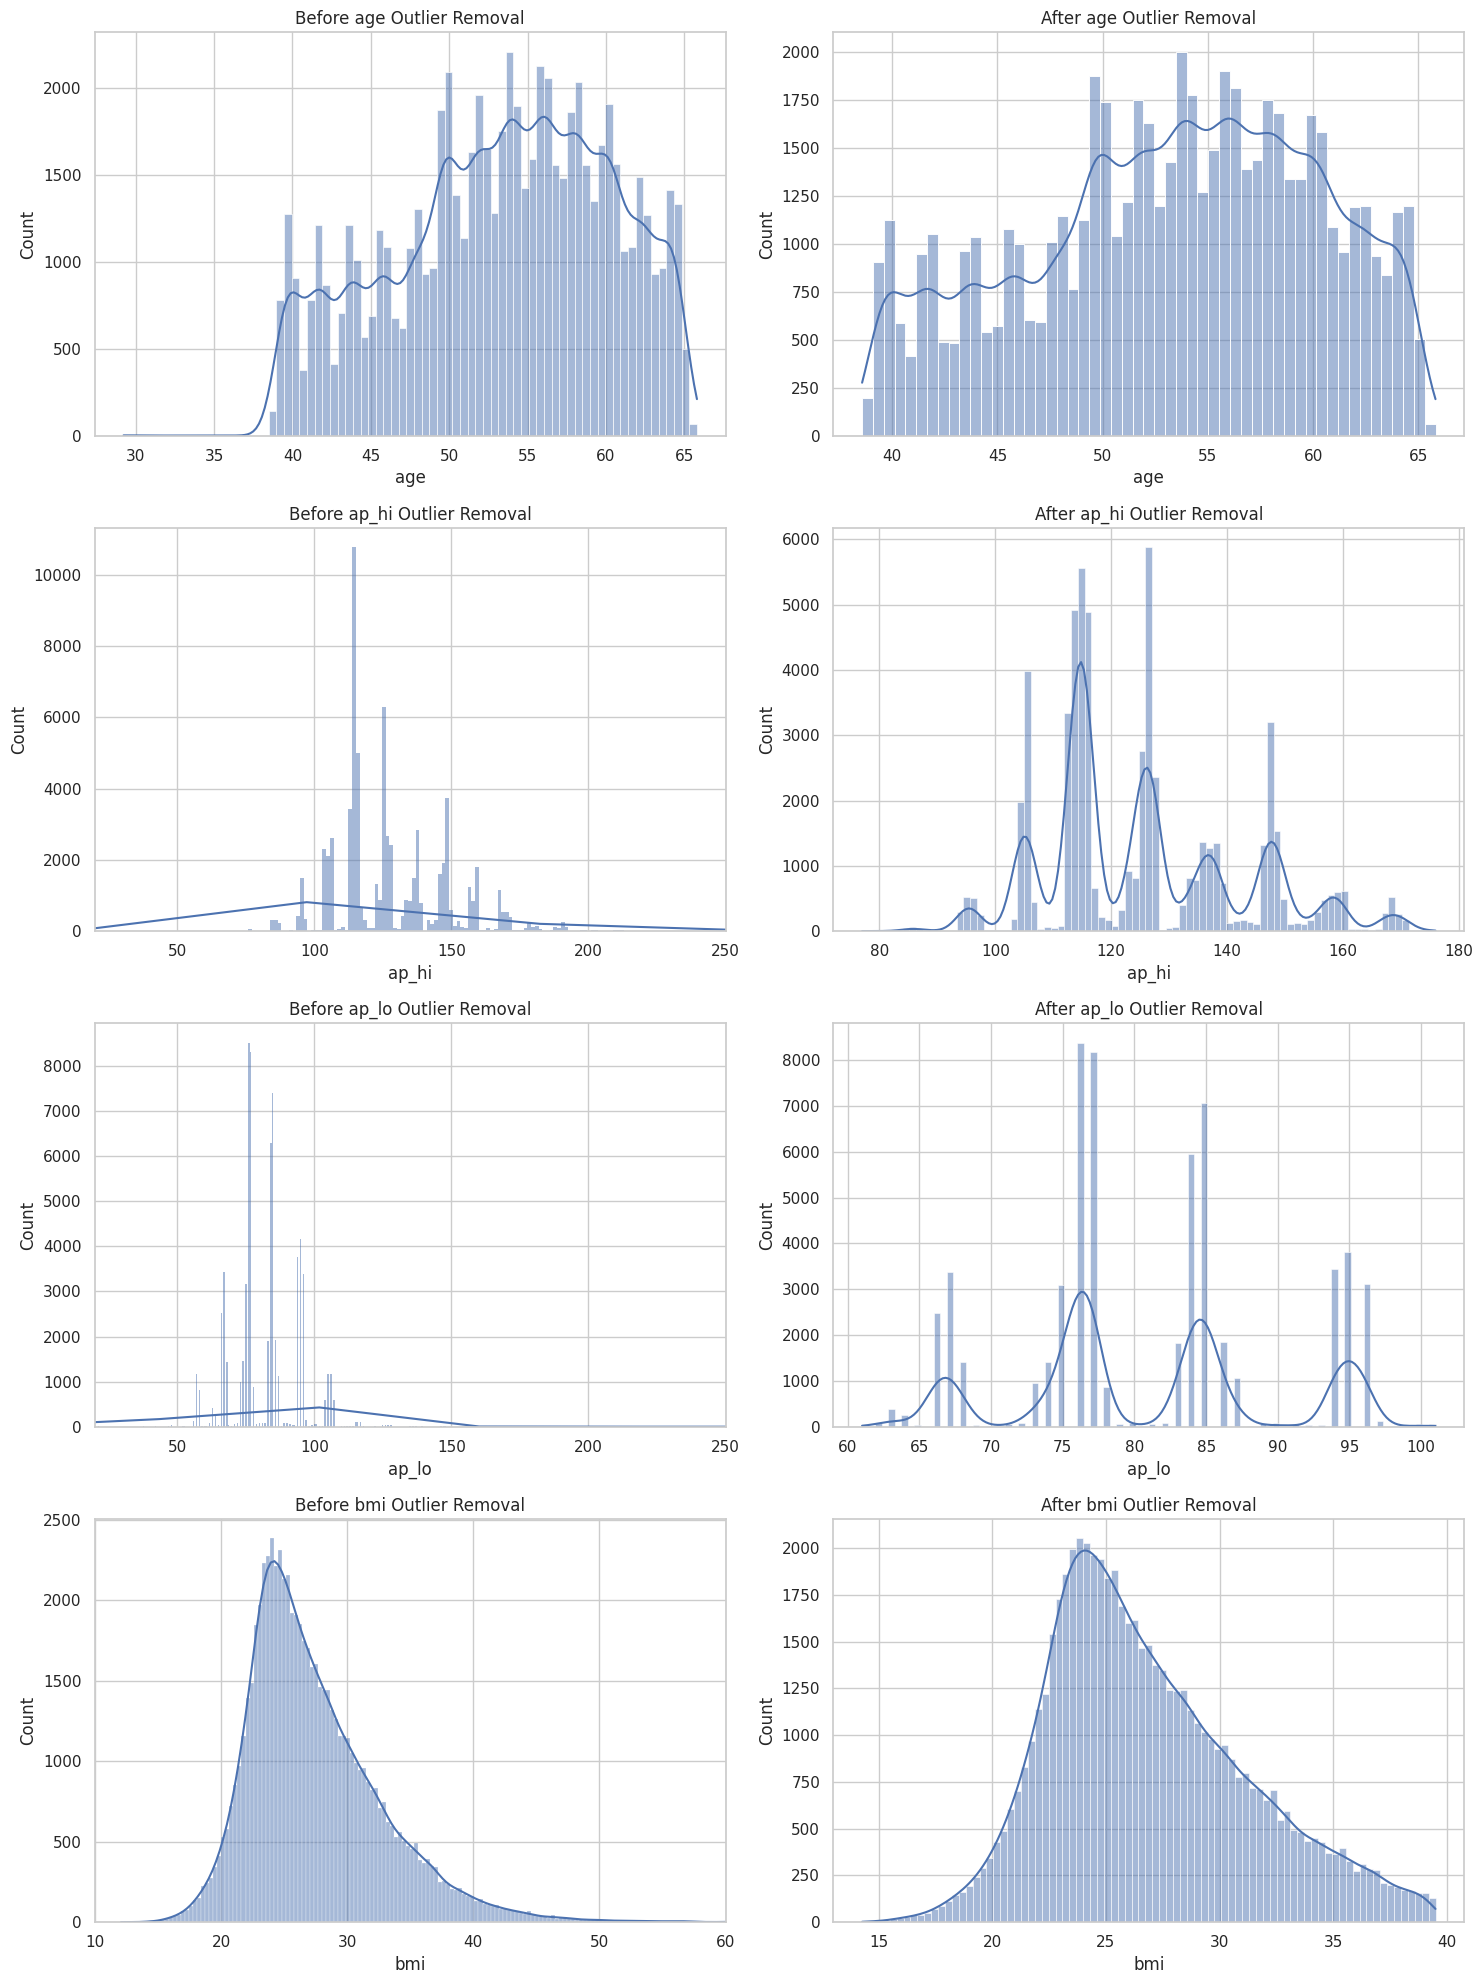

In [ ]:
#now i will plot histograms for each feature before and after outlier removal to check how they were cleaned
import seaborn as sns #for better histograms actaully

plt.figure(figsize=(15,20))
for i,col in enumerate(quantitative_cols): #i used enumerate as it will give me the index that will make me able to plot the figures next to each other
  plt.subplot(len(quantitative_cols),2,2*i + 1)
  sns.histplot(data = clean_bmi_data, x = col, kde = True)
  if col in ['ap_hi', 'ap_lo']:
        plt.xlim(20, 250) # Most human BP is in this range; outliers stay hidden but documented
  elif col == 'bmi':
        plt.xlim(10, 60)
  plt.title(f"Before {col} Outlier Removal")

  plt.subplot(len(quantitative_cols),2, 2*i + 2)
  sns.histplot(data = df_statistical_clean, x = col, kde = True)
  plt.title(f"After {col} Outlier Removal")

plt.tight_layout()
plt.show()


# My comment on the histograms and distribution of each feature:
the age feature appear to have uniform or two uniform distribution next to each other, the age is more between 50 and 60 in our data so it appear as the biggest peak.

The BMI engineered feature appear to have a right skew distribution as the tail near 40 is higher than the tail near 10 and this is meaningful as people with cardiovascular problem will be more with high bmi

ap_lo and ap_hi comments: needed

I will plot boxplots for the features before and after applying the outlier removal method to see how the outliers were handled, as box plot is the best visual to detect outliers

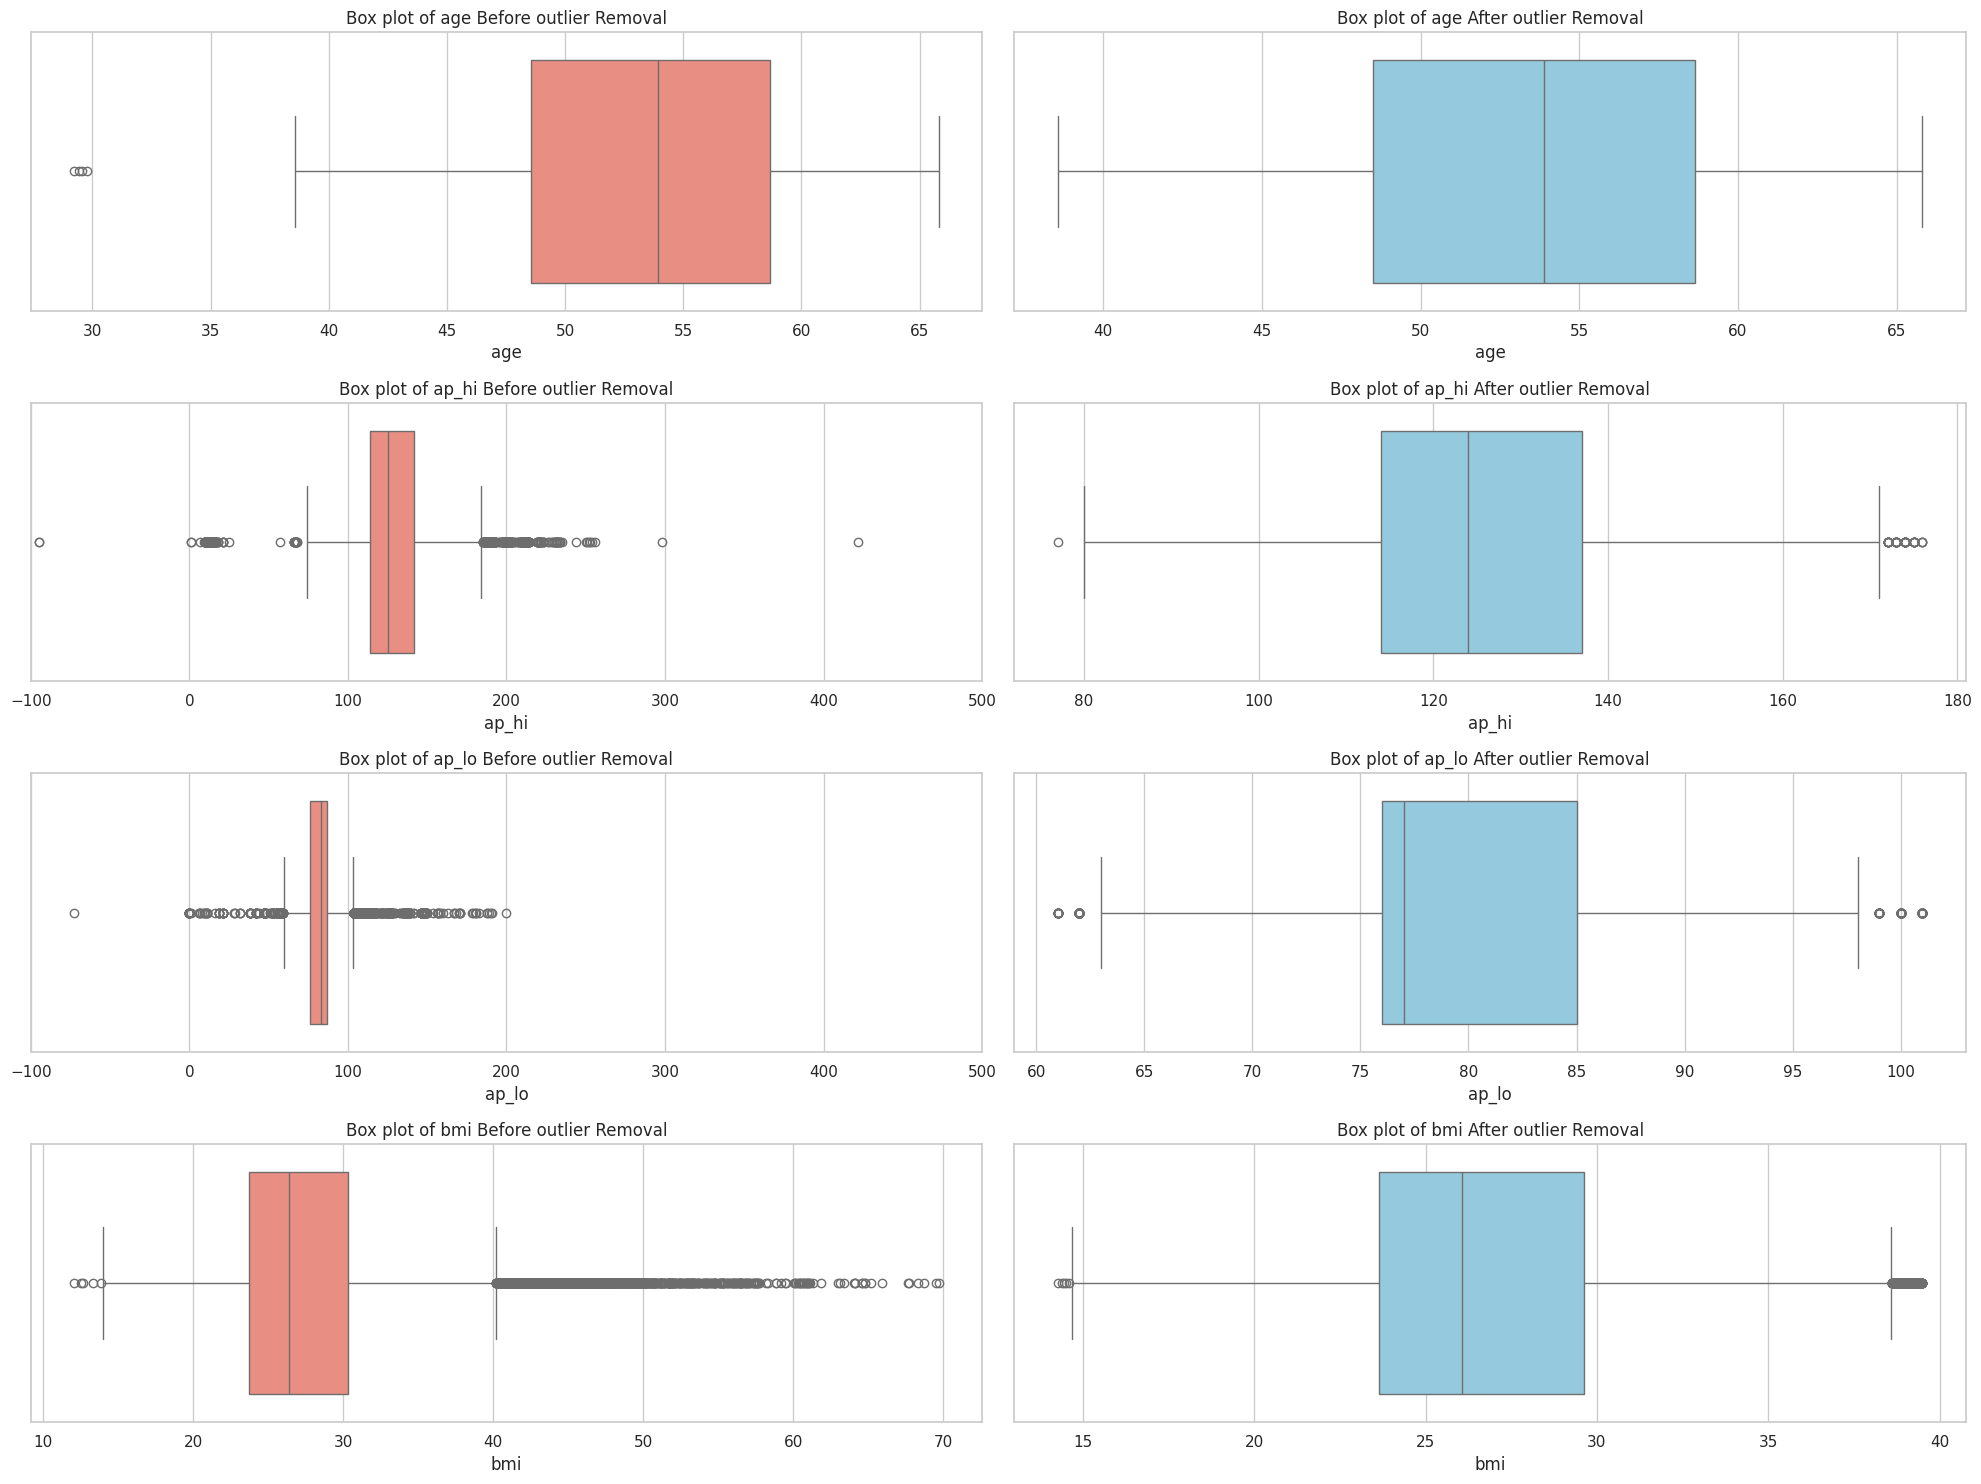

In [ ]:
plt.figure(figsize =(20,15))

for i,col in enumerate(quantitative_cols):
  plt.subplot(len(quantitative_cols),2,2*i+1)
  sns.boxplot(data = clean_bmi_data, x = col,color = 'salmon')
  plt.title(f"Box plot of {col} Before outlier Removal")

  if col in ['ap_hi', 'ap_lo']:
        plt.xlim(-100, 500)
  plt.subplot(len(quantitative_cols),2,2*i+2)
  sns.boxplot(data = df_statistical_clean,x=col,color='skyblue')
  plt.title(f"Box plot of {col} After outlier Removal")

plt.tight_layout()
plt.show()

i think i have cleaned most of the data but i will check if my data now is physiologically okay and belong to living human being
it will be fine for this cleaning, if not i will clean more
i will check the min and max of the cleaned data and compare it to a medical reference to see if everything is fine now

In [ ]:
quantitative_cols.extend(['weight','height']) #here i extended the quntitative list that i made before so it include
print("Data Ranges After Cleaning:")
print(df_statistical_clean[quantitative_cols].agg( ['min','max']))


Data Ranges After Cleaning:
           age  ap_hi  ap_lo        bmi  weight  height
min  38.570842     77     61  14.267099    31.1     135
max  65.809719    176    101  39.502725   137.0     207


since this is happening im going to add a medical bounds also at the above like i did for the ap_lo and the ap_hi step, since the ap_lo contains negative values and the ap_hi contain negative values, im going to remove the negative values first at the beginning of the notebook then apply the normalization

In [ ]:
#now after all this cleaning im going to check one last important thing which is if someone ap_hi is lower than his ap_lo or vice versa
df_statistical_clean[df_statistical_clean['ap_hi'] < df_statistical_clean['ap_lo']]
#since these are present in the data then i must remove them now


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
9897,14119,53.519507,1,148,66.6,82,91,1,1,0,0,1,0,30.405405
46517,66423,41.541410,2,178,91.1,85,96,1,1,1,0,1,0,28.752683


In [ ]:
df_statistical_clean_final = df_statistical_clean[df_statistical_clean['ap_hi'] > df_statistical_clean['ap_lo']]

In [ ]:
df_statistical_clean_final.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,49.785079,2,168,60.0,107,77,1,1,0,0,1,0,21.258503
1,1,55.545517,1,156,86.2,147,96,3,1,0,0,1,1,35.420776
2,2,52.386037,1,165,65.8,139,73,3,1,0,0,0,1,24.168962
5,8,59.452430,1,151,64.7,114,76,2,2,0,0,0,0,28.375948
6,9,60.407940,1,157,89.9,123,75,3,1,0,0,1,0,36.472068
7,12,62.297057,2,178,97.4,138,96,3,3,0,0,1,1,30.741068
8,13,47.846680,1,158,70.3,104,67,1,1,0,0,1,0,28.160551
10,15,61.420945,1,169,78.9,115,77,1,1,0,0,1,0,27.625083
11,16,51.441478,2,173,59.7,115,76,1,1,0,0,1,0,19.947208
12,18,40.117728,2,165,57.8,115,77,1,1,0,0,0,0,21.230487


In [ ]:
df_statistical_clean_final['age'].size

60071

In [ ]:
df['age'].size

70000

In [ ]:
print(f"the number of rows I have removed from the data are: {df['age'].size - df_statistical_clean_final['age'].size}")

the number of rows I have removed from the data are: 9929


In [ ]:
# i will make an extra method now that use interquartile on the data instead of z score to see also which one will give me more accurate results
df_statistical_clean_final.to_csv("cleaned_cardiovas_data.csv")

In [ ]:
df_statistical_clean_final[df_statistical_clean_final['weight'] > 180]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


In [ ]:
df_statistical_clean_final.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,49.785079,2,168,60.0,107,77,1,1,0,0,1,0,21.258503
1,1,55.545517,1,156,86.2,147,96,3,1,0,0,1,1,35.420776
2,2,52.386037,1,165,65.8,139,73,3,1,0,0,0,1,24.168962
5,8,59.452430,1,151,64.7,114,76,2,2,0,0,0,0,28.375948
6,9,60.407940,1,157,89.9,123,75,3,1,0,0,1,0,36.472068
7,12,62.297057,2,178,97.4,138,96,3,3,0,0,1,1,30.741068
8,13,47.846680,1,158,70.3,104,67,1,1,0,0,1,0,28.160551
10,15,61.420945,1,169,78.9,115,77,1,1,0,0,1,0,27.625083
11,16,51.441478,2,173,59.7,115,76,1,1,0,0,1,0,19.947208
12,18,40.117728,2,165,57.8,115,77,1,1,0,0,0,0,21.230487


# Calculate a set of descriptive statistics to quantitatively describe the data

In [ ]:
#now im going to calculate the descriptive statistics to the whole data
def central_tendency_pandas(df,col):
  mean = df[col].mean()
  median = df[col].median()
  mode = df[col].mode().iloc[0]
  return mean,median,mode

def dispersion_pandas(df,col):
  variance = df[col].var()
  std = df[col].std()
  return variance,std

def get_column_stat_pandas(df,col): # i implemented this as a helper method to help me in displaying the statistics as a dataframe then by converting a list into a data frame
  mean,median,mode = central_tendency_pandas(df,col)
  variance,std = dispersion_pandas(df,col)
  return {
        "Feature": col,
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Variance": variance,
        "Std_Dev": std
          }
#here i made a method that calculate the central tendency and dispersion using pandas and then i will implement it from scratch also if needed to be more safe

In [ ]:
df_statistical_clean_final.groupby('cardio')['cardio'].value_counts()

,count
cardio,
0,31895
1,28176


In [ ]:
def central_tendency_scratch(df,col):
  n = len(df[col]) #im getting the number of rows in the coloumn
  col_sum = df[col].sum() #im getting the sum of the column to be able to calculate the mean
  mean = col_sum/n
  print(f"Mean of {col}: {mean}")
  df_sorted = df[col].sort_values(ascending=True) # to get the median we need to sort the column first ascendingly
  if n % 2 == 0: # to check if the n is even or odd to decide which median method to do
    median = (df_sorted.iloc[n//2 - 1] + df_sorted.iloc[n//2])/2
  else: # here if we found that its odd
    median = df_sorted.iloc[n//2]
  print(f"Median of {col}: {median}")
  frequency_dict = {}
  for value in df[col]:
    if value in frequency_dict:
      frequency_dict[value] += 1
    else:
      frequency_dict[value] = 1
  mode = max(frequency_dict, key=frequency_dict.get)
  print(f"Mode of {col}: {mode}")
  return mean,median,mode

def dispersion_scratch(df,col):
    n = len(df[col])
    col_sum = df[col].sum()
    mean = col_sum/n
    squared_diff = [(x - mean)**2 for x in df[col]]
    variance = sum(squared_diff)/n
    print(f"Variance of {col}: {variance}")
    std = variance ** 0.5
    print(f"Standard Deviation of {col}: {std}")
    return variance,std

In [ ]:

def get_column_stat_scratch(df, col):
    mean, median, mode = central_tendency_scratch(df, col)
    variance, std = dispersion_scratch(df, col)

    return {
        "Feature": col,
        "Mean_Scratch": mean,
        "Median_Scratch": median,
        "Mode_Scratch": mode,
        "Var_Scratch": variance,
        "Std_Scratch": std
    }

comparison_list = []

for col in quantitative_cols:
    pandas_stats = get_column_stat_pandas(df_statistical_clean_final, col)

    scratch_stats = get_column_stat_scratch(df_statistical_clean_final, col)

    comparison_row = {
        "Feature": col,

        "Mean (Pandas)": pandas_stats['Mean'],
        "Mean (Scratch)": scratch_stats['Mean_Scratch'],

        "Std (Pandas)": pandas_stats['Std_Dev'],
        "Std (Scratch)": scratch_stats['Std_Scratch'],

        "Var (Pandas)": pandas_stats['Variance'],
        "Var (Scratch)": scratch_stats['Var_Scratch']
    }
    comparison_list.append(comparison_row)

comparison_df = pd.DataFrame(comparison_list)
display(comparison_df)

Mean of age: 53.263566290270866
Median of age: 53.87268993839836
Mode of age: 56.49555099247091
Variance of age: 46.90416443115432
Standard Deviation of age: 6.848661506539385
Mean of ap_hi: 125.33467063974297
Median of ap_hi: 124
Mode of ap_hi: 115
Variance of ap_hi: 280.8985663874356
Standard Deviation of ap_hi: 16.760028830149295
Mean of ap_lo: 80.76597692730269
Median of ap_lo: 77
Mode of ap_lo: 76
Variance of ap_lo: 78.23332562543575
Standard Deviation of ap_lo: 8.844960464888226
Mean of bmi: 26.853080570031995
Median of bmi: 26.05619146722164
Mode of bmi: 23.32415059687787
Variance of bmi: 19.59054796364039
Standard Deviation of bmi: 4.4261210968115625
Mean of weight: 72.78702035924158
Median of weight: 71.2
Mode of weight: 67.5
Variance of weight: 160.85365333978612
Standard Deviation of weight: 12.682809363062512
Mean of height: 164.6774649997503
Median of height: 165
Mode of height: 165
Variance of height: 59.70141806145709
Standard Deviation of height: 7.726669273461696


,Feature,Mean (Pandas),Mean (Scratch),Std (Pandas),Std (Scratch),Var (Pandas),Var (Scratch)
0,age,53.263566,53.263566,6.848719,6.848662,46.904945,46.904164
1,ap_hi,125.334671,125.334671,16.760168,16.760029,280.903243,280.898566
2,ap_lo,80.765977,80.765977,8.845034,8.844960,78.234628,78.233326
3,bmi,26.853081,26.853081,4.426158,4.426121,19.590874,19.590548
4,weight,72.787020,72.787020,12.682915,12.682809,160.856331,160.853653
5,height,164.677465,164.677465,7.726734,7.726669,59.702412,59.701418


In [ ]:
df_statistical_clean_final.to_csv("cvd_cleaned.csv")

In [ ]:
results_list_pandas = [] # this is the list that stores the statistics for each col returned from get_column method
for col in quantitative_cols:
  results_list_pandas.append(get_column_stat_pandas(df_statistical_clean_final,col))

results_df_pandas = pd.DataFrame(results_list_pandas)
results_df_pandas # here i convert the list into a data frame and display it so the results appear in a clean way

,Feature,Mean,Median,Mode,Variance,Std_Dev
0,age,53.263566,53.872690,56.495551,46.904945,6.848719
1,ap_hi,125.334671,124.000000,115.000000,280.903243,16.760168
2,ap_lo,80.765977,77.000000,76.000000,78.234628,8.845034
3,bmi,26.853081,26.056191,23.324151,19.590874,4.426158
4,weight,72.787020,71.200000,67.300000,160.856331,12.682915
5,height,164.677465,165.000000,165.000000,59.702412,7.726734


### Categorical Features Analysis
For categorical variables (`cholesterol`, `gluc`, `smoke`, `alco`, `active`), numerical statistics like **Mean** and **Standard Deviation** are not interpretable for ex: a mean smoking value of 0.09 has no physical meaning

Instead, we calculate:
1.  **Mode:** To identify the most frequent category (the majority of patients have normal cholesterol).
2.  **Value Counts & Percentages:** To measure how many times it happened.



In [ ]:
def get_column_stat_categorical(df, col):
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    mode = df[col].mode()[0]
    return {
        "Feature": col,
        "Mode": mode,
        "Counts": counts.to_dict(),
        "Percentages": percentages.to_dict()
    }



In [ ]:
categorical_cols = ['cholesterol', 'smoke', 'alco','gluc', 'active']
rows = []

for col in categorical_cols:
    counts = df_statistical_clean_final[col].value_counts()
    percentages = df_statistical_clean_final[col].value_counts(normalize=True) * 100
    mode = df_statistical_clean_final[col].mode()[0]

    row_dict = {"Feature": col, "Mode": mode}


    for val in counts.index:
        row_dict[f"{val}_count"] = counts[val]
        row_dict[f"{val}_perc"] = percentages[val]

    rows.append(row_dict)

import pandas as pd
results_df_categorical = pd.DataFrame(rows)
results_df_categorical


,Feature,Mode,1_count,1_perc,2_count,2_perc,3_count,3_perc,0_count,0_perc
0,cholesterol,1,42102,70.087064,10282.0,17.116412,7687.0,12.796524,NaN,NaN
1,smoke,0,5258,8.752976,NaN,NaN,NaN,NaN,54813.0,91.247024
2,alco,0,3102,5.163889,NaN,NaN,NaN,NaN,56969.0,94.836111
3,gluc,1,51507,85.743537,4079.0,6.790298,4485.0,7.466165,NaN,NaN
4,active,1,48276,80.364902,NaN,NaN,NaN,NaN,11795.0,19.635098


#the two types of columns and the difference between them

In [ ]:
results_list_all = []

for col in quantitative_cols:
    results_list_all.append(get_column_stat_pandas(df_statistical_clean_final, col))

for col in categorical_cols:
    mode = df_statistical_clean_final[col].mode()[0]
    mode_count = (df_statistical_clean_final[col] == mode).sum()
    mode_percentage = (df_statistical_clean_final[col] == mode).mean() * 100

    results_list_all.append({
        "Feature": col,
        "Mean": None,
        "Median": None,
        "Mode": mode,
        "Variance": None,
        "Std_Dev": None,
        "Mode_Count": mode_count,
        "Mode_Percentage": mode_percentage
    })

results_df_all = pd.DataFrame(results_list_all)
results_df_all


,Feature,Mean,Median,Mode,Variance,Std_Dev,Mode_Count,Mode_Percentage
0,age,53.263566,53.872690,56.495551,46.904945,6.848719,NaN,NaN
1,ap_hi,125.334671,124.000000,115.000000,280.903243,16.760168,NaN,NaN
2,ap_lo,80.765977,77.000000,76.000000,78.234628,8.845034,NaN,NaN
3,bmi,26.853081,26.056191,23.324151,19.590874,4.426158,NaN,NaN
4,weight,72.787020,71.200000,67.300000,160.856331,12.682915,NaN,NaN
5,height,164.677465,165.000000,165.000000,59.702412,7.726734,NaN,NaN
6,cholesterol,NaN,NaN,1.000000,NaN,NaN,42102.0,70.087064
7,smoke,NaN,NaN,0.000000,NaN,NaN,54813.0,91.247024
8,alco,NaN,NaN,0.000000,NaN,NaN,56969.0,94.836111
9,gluc,NaN,NaN,1.000000,NaN,NaN,51507.0,85.743537


# standardization with built in fnction in python (sklearn)

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_statistical_clean_final.copy()

scaler = StandardScaler()

df_scaled[quantitative_cols] = scaler.fit_transform(df_scaled[quantitative_cols])

df_scaled[quantitative_cols].head()


,age,ap_hi,ap_lo,bmi,weight,height
0,-0.507908,-1.093952,-0.425777,-1.263991,-1.008217,0.430009
1,0.333197,1.292679,1.722339,1.935712,1.057572,-1.123054
2,-0.128132,0.815352,-0.878011,-0.606427,-0.550905,0.041743
5,0.903660,-0.676292,-0.538835,0.344064,-0.637636,-1.770163
6,1.043178,-0.139300,-0.651894,2.173232,1.349305,-0.993632


# standardization with code

In [ ]:

df_standardized = df_statistical_clean_final.copy()

for col in quantitative_cols:
    mean = results_df_all.loc[results_df_all['Feature'] == col, 'Mean'].values[0]
    std = results_df_all.loc[results_df_all['Feature'] == col, 'Std_Dev'].values[0]

    df_standardized[col] = (df_standardized[col] - mean) / std


In [ ]:
df_standardized[quantitative_cols].describe()
original_head = df_statistical_clean_final[quantitative_cols].head()

standardized_head = df_standardized[quantitative_cols].head()

comparison = pd.concat([original_head, standardized_head], axis=1, keys=['Original', 'Standardized'])
comparison



Original                                      Standardized            \
         age ap_hi ap_lo        bmi weight height          age     ap_hi   
0  49.785079   107    77  21.258503   60.0    168    -0.507903 -1.093943   
1  55.545517   147    96  35.420776   86.2    156     0.333194  1.292668   
2  52.386037   139    73  24.168962   65.8    165    -0.128130  0.815346   
5  59.452430   114    76  28.375948   64.7    151     0.903653 -0.676286   
6  60.407940   123    75  36.472068   89.9    157     1.043169 -0.139299   

                                           
      ap_lo       bmi    weight    height  
0 -0.425773 -1.263980 -1.008208  0.430005  
1  1.722325  1.935696  1.057563 -1.123044  
2 -0.878004 -0.606422 -0.550900  0.041743  
5 -0.538831  0.344061 -0.637631 -1.770148  
6 -0.651889  2.173214  1.349294 -0.993624

In [ ]:
comparison = pd.DataFrame({
    'Manual_Standardization': df_standardized[quantitative_cols].iloc[0],
    'Sklearn_Standardization': df_scaled[quantitative_cols].iloc[0]
})

comparison


,Manual_Standardization,Sklearn_Standardization
age,-0.507903,-0.507908
ap_hi,-1.093943,-1.093952
ap_lo,-0.425773,-0.425777
bmi,-1.263980,-1.263991
weight,-1.008208,-1.008217
height,0.430005,0.430009


In [ ]:
#compute error
df_original = df_statistical_clean_final.copy()

df_manual = df_original.copy()
for col in quantitative_cols:
    mean = results_df_all.loc[results_df_all['Feature'] == col, 'Mean'].values[0]
    std = results_df_all.loc[results_df_all['Feature'] == col, 'Std_Dev'].values[0]
    df_manual[col] = (df_manual[col] - mean) / std

scaler = StandardScaler()
df_sklearn = df_original.copy()
df_sklearn[quantitative_cols] = scaler.fit_transform(df_sklearn[quantitative_cols])

mae_per_column = np.mean(np.abs(df_manual[quantitative_cols] - df_sklearn[quantitative_cols]), axis=0)
print("Mean Absolute Error per column:")
print(mae_per_column)

overall_mae = np.mean(mae_per_column)
print(f"\nOverall Mean Absolute Error: {overall_mae}")


Mean Absolute Error per column:
age       0.000007
ap_hi     0.000007
ap_lo     0.000007
bmi       0.000007
weight    0.000007
height    0.000007
dtype: float64

Overall Mean Absolute Error: 6.76291752368001e-06


so there is small differenve with small error





#Training data

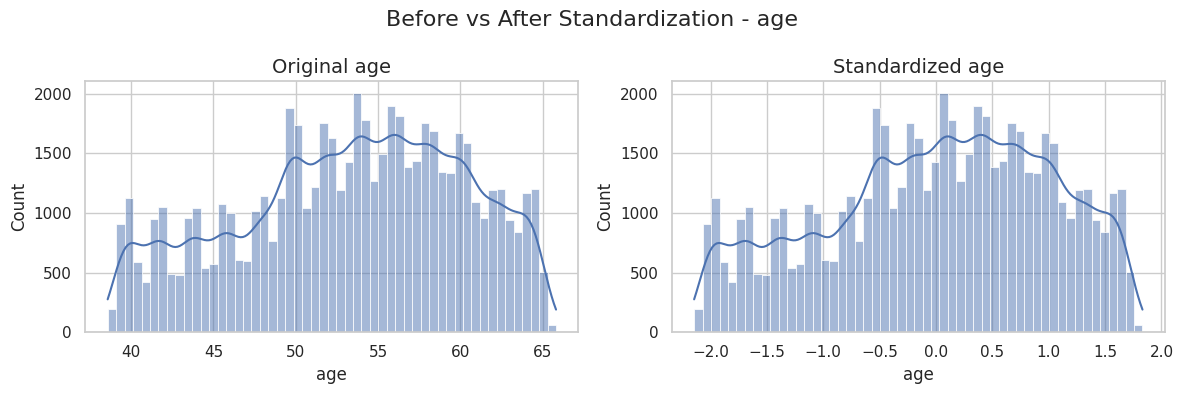

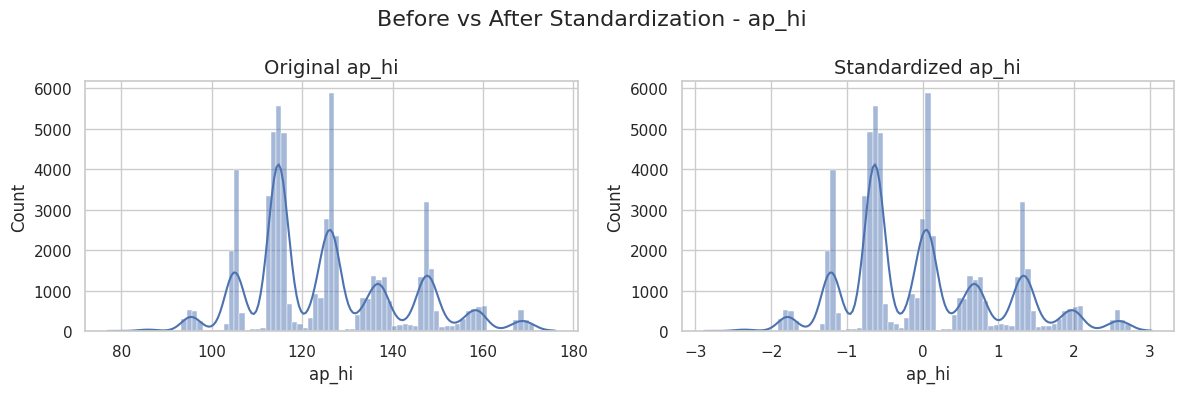

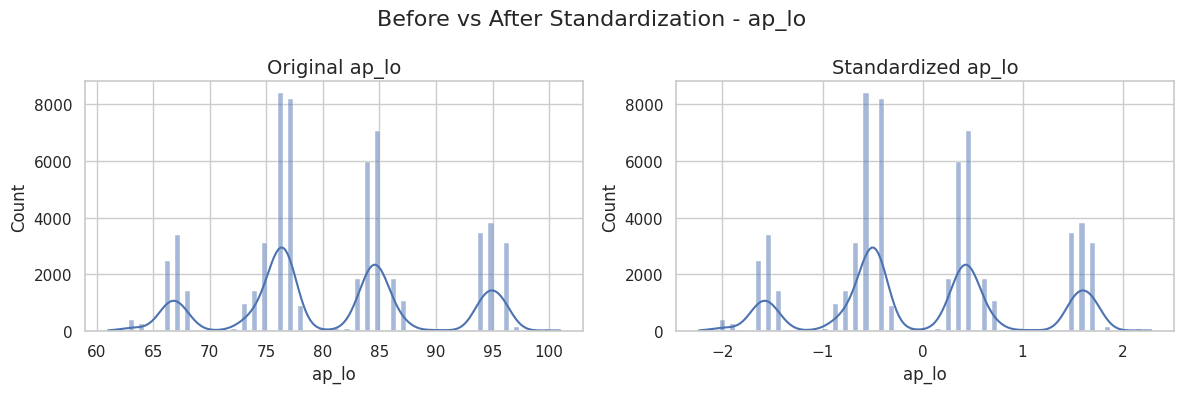

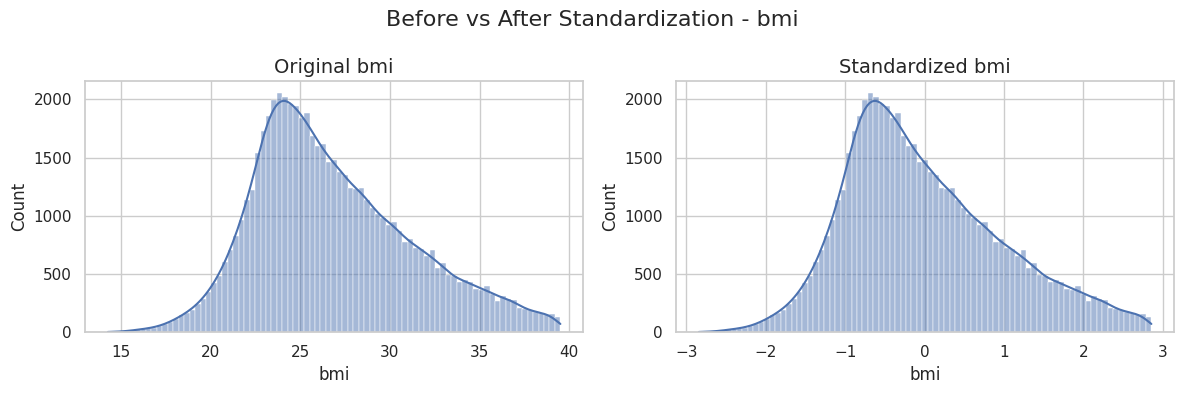

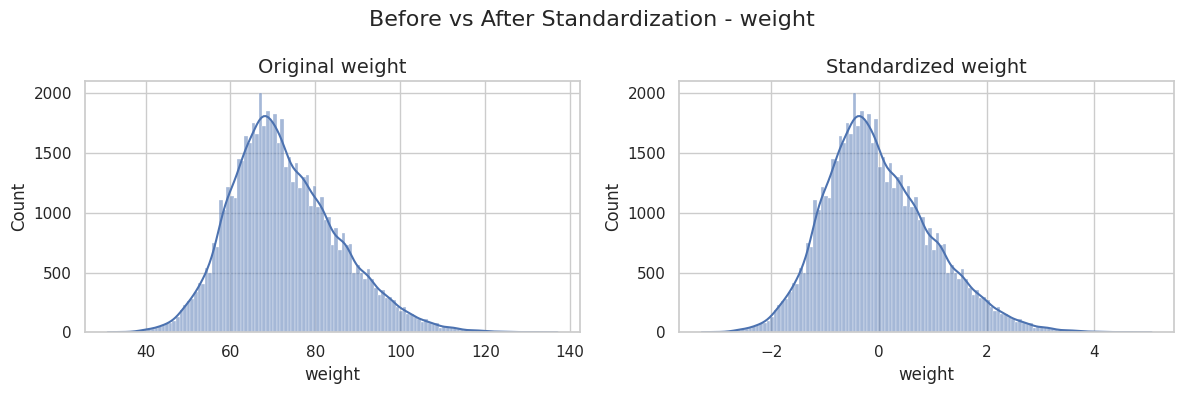

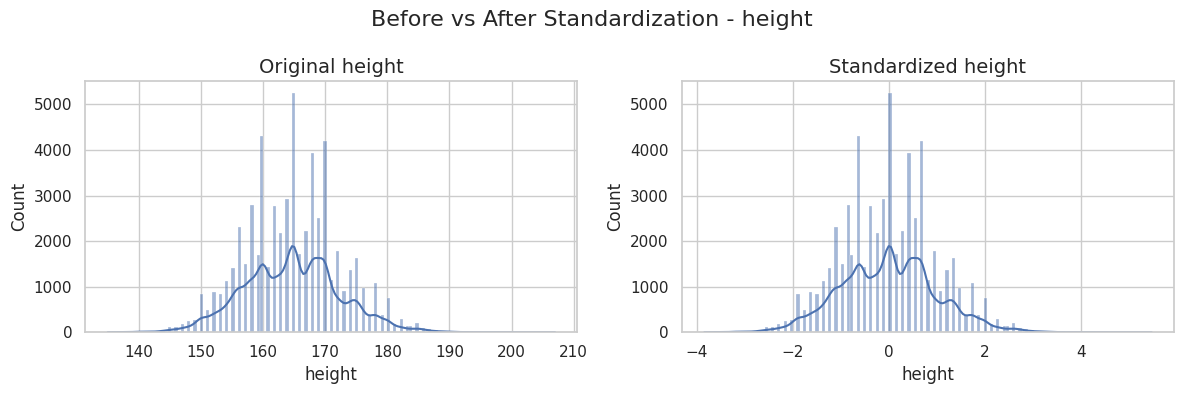

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for col in quantitative_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Original Data Plot
    sns.histplot(df_statistical_clean_final[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Original {col}', fontsize=14)
    axes[0].set_xlabel(col)

    # Standardized Data Plot
    sns.histplot(df_standardized[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Standardized {col}', fontsize=14)
    axes[1].set_xlabel(col)

    plt.suptitle(f'Before vs After Standardization - {col}', fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
df_standardized.head(10)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,-0.507903,2,0.430005,-1.008208,-1.093943,-0.425773,1,1,0,0,1,0,-1.263980
1,1,0.333194,1,-1.123044,1.057563,1.292668,1.722325,3,1,0,0,1,1,1.935696
2,2,-0.128130,1,0.041743,-0.550900,0.815346,-0.878004,3,1,0,0,0,1,-0.606422
5,8,0.903653,1,-1.770148,-0.637631,-0.676286,-0.538831,2,2,0,0,0,0,0.344061
6,9,1.043169,1,-0.993624,1.349294,-0.139299,-0.651889,3,1,0,0,1,0,2.173214
7,12,1.319004,2,1.724213,1.940641,0.755680,1.722325,3,3,0,0,1,1,0.878411
8,13,-0.790934,1,-0.864203,-0.196092,-1.272939,-1.556351,1,1,0,0,1,0,0.295396
10,15,1.191081,1,0.559426,0.481985,-0.616621,-0.425773,1,1,0,0,1,0,0.174418
11,16,-0.266048,2,1.077109,-1.031862,-0.616621,-0.538831,1,1,0,0,1,0,-1.560241
12,18,-1.919460,2,0.041743,-1.181670,-0.616621,-0.425773,1,1,0,0,0,0,-1.270310


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your target column is named 'cardio'
X = df_standardized.drop('cardio', axis=1)
y = df_standardized['cardio']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

print("X_train head:")
display(X_train.head(10))

print("X_test head:")
display(X_test.head(10))

print("y_train head:")
display(y_train.head(10))

print("y_test head:")
display(y_test.head(10))


X_train head:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
30422,43506,0.787322,1,-0.605361,1.167948,0.159028,0.478689,1,1,0,0,0,1.664123
48158,68778,-1.471328,1,-0.217099,0.568716,-0.676286,-0.538831,1,1,0,0,1,0.735897
49452,70607,-0.159712,2,0.430005,0.079870,1.471664,0.478689,1,1,0,0,1,-0.159308
69698,99552,1.154303,1,-0.864203,-0.172438,0.397689,0.478689,1,1,0,0,1,0.322547
53381,76168,0.673790,1,0.947688,-0.006861,-0.735951,-0.651889,1,3,0,0,1,-0.514890
24453,34924,-1.632031,1,-0.346520,-0.708593,-0.019968,0.365631,1,1,0,0,1,-0.574485
19552,27923,0.062556,2,0.430005,-0.661285,-0.676286,-0.425773,1,1,1,0,1,-0.911766
63001,89969,-2.008606,1,-0.734782,1.175832,0.755680,2.061498,1,1,0,0,1,1.770611
35258,50368,-0.402367,1,-0.475940,0.103523,0.696015,1.496209,3,1,0,0,0,0.391712
69762,99648,1.183486,1,-2.028990,-0.046284,0.099362,0.478689,3,1,0,0,1,1.280564


X_test head:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
69025,98599,0.003391,1,-0.605361,0.497755,-0.139299,-0.425773,2,1,0,0,1,0.913966
19276,27541,0.110127,1,0.300584,1.081217,1.948986,1.722325,3,3,0,0,1,0.940484
3352,4734,0.631815,1,-1.123044,-1.000324,-1.272939,-0.651889,1,1,0,0,0,-0.487366
46751,66761,-1.993415,2,0.430005,-1.000324,1.352333,0.252574,1,1,0,0,0,-1.255976
58085,82880,-0.425553,1,1.335951,1.711987,1.292668,1.722325,1,1,0,0,1,0.904636
67596,96514,0.379566,1,0.818268,0.600255,0.039697,0.365631,1,1,0,0,1,0.145173
10562,15094,0.394757,1,0.041743,-0.432631,-0.556956,-0.651889,1,1,0,0,1,-0.481943
4988,7067,0.590240,1,-0.087678,1.641025,0.397689,0.478689,2,2,1,0,1,1.795605
17060,24376,-0.095350,1,-2.287832,-2.206671,1.233002,1.722325,3,1,0,0,1,-1.382910
17904,25590,-2.003409,1,-1.640728,-0.535131,-0.735951,-0.425773,1,1,0,0,1,0.387108


y_train head:


,cardio
30422,1
48158,0
49452,1
69698,0
53381,0
24453,1
19552,0
63001,0
35258,1
69762,1


y_test head:


,cardio
69025,0
19276,1
3352,0
46751,1
58085,1
67596,1
10562,0
4988,0
17060,1
17904,0


In [ ]:
import pandas as pd

train_data = pd.concat([X_train, y_train], axis=1)

test_data = pd.concat([X_test, y_test], axis=1)

display(train_data.head(10))
display(test_data.head(10))


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,cardio
30422,43506,0.787322,1,-0.605361,1.167948,0.159028,0.478689,1,1,0,0,0,1.664123,1
48158,68778,-1.471328,1,-0.217099,0.568716,-0.676286,-0.538831,1,1,0,0,1,0.735897,0
49452,70607,-0.159712,2,0.430005,0.079870,1.471664,0.478689,1,1,0,0,1,-0.159308,1
69698,99552,1.154303,1,-0.864203,-0.172438,0.397689,0.478689,1,1,0,0,1,0.322547,0
53381,76168,0.673790,1,0.947688,-0.006861,-0.735951,-0.651889,1,3,0,0,1,-0.514890,0
24453,34924,-1.632031,1,-0.346520,-0.708593,-0.019968,0.365631,1,1,0,0,1,-0.574485,1
19552,27923,0.062556,2,0.430005,-0.661285,-0.676286,-0.425773,1,1,1,0,1,-0.911766,0
63001,89969,-2.008606,1,-0.734782,1.175832,0.755680,2.061498,1,1,0,0,1,1.770611,0
35258,50368,-0.402367,1,-0.475940,0.103523,0.696015,1.496209,3,1,0,0,0,0.391712,1
69762,99648,1.183486,1,-2.028990,-0.046284,0.099362,0.478689,3,1,0,0,1,1.280564,1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,cardio
69025,98599,0.003391,1,-0.605361,0.497755,-0.139299,-0.425773,2,1,0,0,1,0.913966,0
19276,27541,0.110127,1,0.300584,1.081217,1.948986,1.722325,3,3,0,0,1,0.940484,1
3352,4734,0.631815,1,-1.123044,-1.000324,-1.272939,-0.651889,1,1,0,0,0,-0.487366,0
46751,66761,-1.993415,2,0.430005,-1.000324,1.352333,0.252574,1,1,0,0,0,-1.255976,1
58085,82880,-0.425553,1,1.335951,1.711987,1.292668,1.722325,1,1,0,0,1,0.904636,1
67596,96514,0.379566,1,0.818268,0.600255,0.039697,0.365631,1,1,0,0,1,0.145173,1
10562,15094,0.394757,1,0.041743,-0.432631,-0.556956,-0.651889,1,1,0,0,1,-0.481943,0
4988,7067,0.590240,1,-0.087678,1.641025,0.397689,0.478689,2,2,1,0,1,1.795605,0
17060,24376,-0.095350,1,-2.287832,-2.206671,1.233002,1.722325,3,1,0,0,1,-1.382910,1
17904,25590,-2.003409,1,-1.640728,-0.535131,-0.735951,-0.425773,1,1,0,0,1,0.387108,0


In [ ]:

train_path = '/content/drive/MyDrive/train_data.csv'
test_path = '/content/drive/MyDrive/test_data.csv'


train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)

print("saving done!")


saving done!


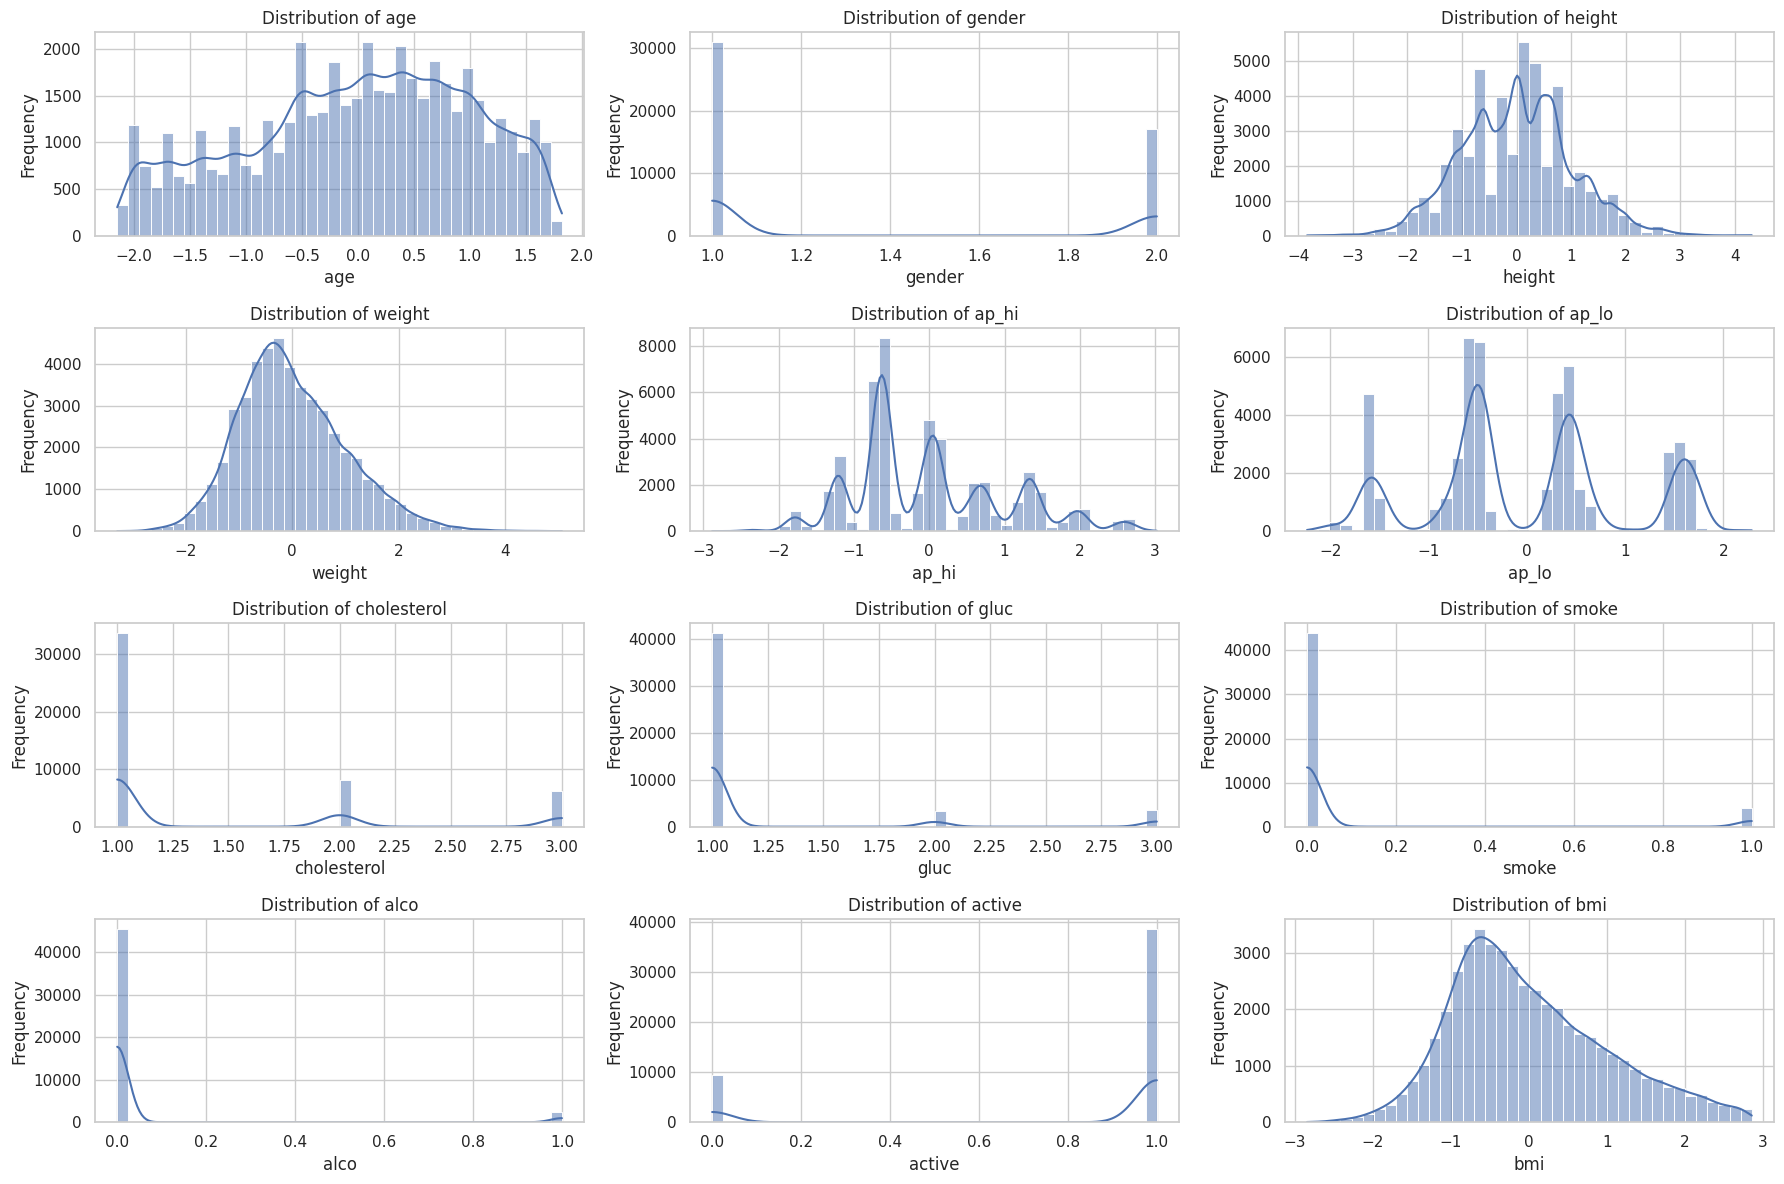

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

new_data = pd.read_csv('/content/drive/MyDrive/train_data.csv')

features = new_data.drop(['id', 'cardio'], axis=1)

plt.figure(figsize=(18, 12))
n_cols = 3
n_rows = (len(features.columns) + n_cols - 1) // n_cols

for i, column in enumerate(features.columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(new_data[column], kde=True, bins=40)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Individual Feature Distribution Analysis

### 1. Age
* **General Type:** Gaussian Distribution.
* **Specific Characteristic:** Slightly Irregular (Jagged).
* **Reason:** Due to the conversion of age from days to years, causing data points to group at specific integer values.

### 2. Gender
* **General Type:** Discrete Distribution.
* **Specific Characteristic:** Binary.
* **Reason:** Represents two distinct biological categories (Male/Female), with a slight imbalance (more females).

### 3. Height
* **General Type:** Gaussian Distribution.
* **Specific Characteristic:** Symmetric (Bell-Shaped).
* **Reason:** Represents a natural biological trait that follows a near-perfect normal distribution centered around the mean.

### 4. Weight
* **General Type:** Gaussian Distribution.
* **Specific Characteristic:** Right-Skewed.
* **Reason:** The tail extends to the right (positive values), capturing the segment of the population with higher body weight (obesity).

### 5. AP_HI (Systolic Blood Pressure)
* **General Type:** Gaussian-like Distribution.
* **Specific Characteristic:** Multi-modal (Spiky) & Right-Skewed.
* **Reason:** **Rounding Bias.** Peaks appear at specific values (e.g., 120, 140) because doctors tend to round measurements. The right skew indicates hypertension prevalence.

### 6. AP_LO (Diastolic Blood Pressure)
* **General Type:** Gaussian-like Distribution.
* **Specific Characteristic:** Multi-modal (Spiky).
* **Reason:** Similar to systolic pressure, distinct spikes occur due to digit preference in clinical measurement (e.g., rounding to 80, 90).

### 7. Cholesterol
* **General Type:** Discrete Distribution.
* **Specific Characteristic:** Ordinal (Right-Skewed).
* **Reason:** Shows a sharp decay in frequency. Most patients are in the 'Normal' category (Class 1), with fewer in 'Above Normal' and 'Well Above Normal'.

### 8. Glucose (Gluc)
* **General Type:** Discrete Distribution.
* **Specific Characteristic:** Ordinal (Heavily Right-Skewed).
* **Reason:** Similar to cholesterol but more extreme; the vast majority of patients have normal glucose levels, making high levels a strong specific signal.

### 9. Smoke
* **General Type:** Discrete Distribution.
* **Specific Characteristic:** Binary (Imbalanced).
* **Reason:** Highly skewed towards 0 (Non-smokers), indicating that smoking is a relatively rare habit in this specific dataset.

### 10. Alcohol (Alco)
* **General Type:** Discrete Distribution.
* **Specific Characteristic:** Binary (Heavily Imbalanced).
* **Reason:** Similar to smoking, alcohol consumption is reported by a very small minority of the participants.

### 11. Active
* **General Type:** Discrete Distribution.
* **Specific Characteristic:** Binary (Left-Skewed).
* **Reason:** Skewed towards 1 (Active), meaning the majority of patients in this dataset engage in physical activity.

### 12. BMI
* **General Type:** Gaussian Distribution.
* **Specific Characteristic:** Right-Skewed.
* **Reason:** Combines height and weight. The right skew reflects the distribution of body mass, highlighting the prevalence of overweight/obese individuals.

Normality test:
Measuring skewness and kurtosis, the null hypothesis is assuming they are

### **Normality Testing Summary**

#### **1. Traditional Methods & Why We Rejected Them**
We initially attempted to test for normality using standard statistical tests, specifically the **Shapiro-Wilk** and **Kolmogorov-Smirnov** tests.

* **Method:** These tests calculate a p-value to check the Null Hypothesis ($H_0$) that the data is perfectly distinct from a normal distribution.
* **Result:** All features (Height, Weight, Age) returned p-values $< 0.05$, suggesting the data is **not normal**, despite visual inspection (histograms/Q-Q plots) showing a clear bell shape.
* **Reason for Failure:** Our dataset is large ($N \approx 50,000$). Traditional tests suffer from the **"Large Sample Paradox."** They become hypersensitive to microscopic, irrelevant deviations from mathematical perfection. With $N=50k$, even a trivial 0.1% deviation is flagged as "Statistically Significant," rendering these tests useless for practical validation.

#### **2. Adopted Approach: Skewness & Kurtosis**
Instead of a strict "Pass/Fail" hypothesis test, we evaluated the **magnitude** of the deviation using descriptive statistics.

* **The Logic:** We shifted from asking *"Is it perfectly normal?"* to *"Is it normal enough for analysis?"*
* **The Metrics:**
    * **Skewness:** Measures symmetry (Ideal = 0).
    * **Kurtosis:** Measures "tailedness" and peak intensity (Ideal Excess Kurtosis = 0).

#### **3. Conclusion Criteria**
We assessed normality based on accepted statistical thresholds for "Normal Enough" distributions rather than p-values:

* **Range:** We consider the data effectively normal if:
    * **Skewness** is between **-1 and +1**.
    * **Excess Kurtosis** is between **-1 and +1**.

Skewness of age is: -0.2876820391531454
Kurtosis of age is: -0.8224670337171922
Skewness of height is: 0.1259429699413343
Kurtosis of height is: 0.13928310583118675
Skewness of weight is: 0.5314778407020168
Kurtosis of weight is: 0.3599461247556288
Skewness of ap_hi is: 0.6097310911520591
Kurtosis of ap_hi is: -0.19888114108021515
Skewness of ap_lo is: 0.149054593400629
Kurtosis of ap_lo is: -0.7359488598131398
Skewness of bmi is: 0.5708402915022093
Kurtosis of bmi is: -0.09572041836045209
skewness insights
age is approximately symmetric (slightly negatively skewed)
height is approximately symmetric (slightly positively skewed)
weight is moderately positively skewed
ap_hi is moderately positively skewed
ap_lo is approximately symmetric (slightly positively skewed)
bmi is moderately positively skewed

kurtosis insights
age is left tailed
height is right tailed
weight is right tailed
ap_hi is left tailed
ap_lo is left tailed
bmi is left tailed

normal distribution insights
age is approxi

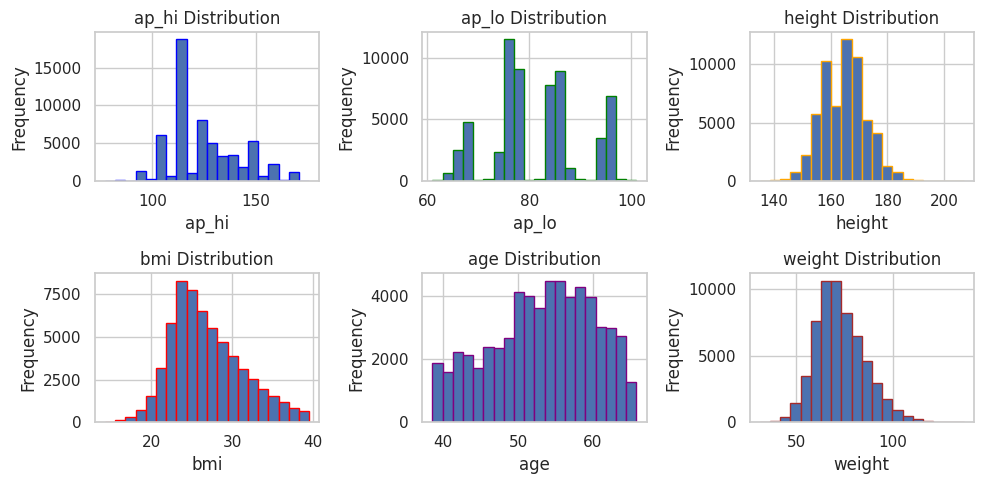

In [ ]:
df = pd.read_csv("cvd_cleaned.csv")

quant_data = ['age', 'height', 'weight', 'ap_hi', 'ap_lo','bmi']
skewness = {}
kurtosis = {}
for col in quant_data:
    mean = df[col].mean()
    std = df[col].std()
    skew = (((df[col] - mean)/std) ** 3).sum() / len(df[col])
    skewness[col] = skew
    print("Skewness of", col, "is:", skew)

    kurt = (((df[col] - mean)/std) ** 4).sum() / len(df[col]) -3
    kurtosis[col] = kurt
    print("Kurtosis of", col, "is:", kurt)

print("skewness insights")
for key, value in skewness.items():
    if value > 1:
        print(f"{key} is highly positively skewed")
    elif 0.5 < value <= 1:
        print(f"{key} is moderately positively skewed")
    elif 0 < value <= 0.5:
        print(f"{key} is approximately symmetric (slightly positively skewed)")
    elif -0.5 <= value < 0:
        print(f"{key} is approximately symmetric (slightly negatively skewed)")
    elif -1 <= value < -0.5:
        print(f"{key} is moderately negatively skewed")
    else:
        print(f"{key} is highly negatively skewed")

print("\nkurtosis insights")
for key, value in kurtosis.items():
    if value > 0:
        print(f"{key} is right tailed")
    elif value == 0:
        print(f"{key} is normal distribution")
    else:
        print(f"{key} is left tailed")

print("\nnormal distribution insights")
for key, value in skewness.items():
    kurt = kurtosis[key]
    if abs(value) < 1 and abs(kurt) < 1:
        print(f"{key} is approximately normally distributed")
    else:
        print(f"{key} is not normally distributed")

fig,ax=plt.subplots(2,3, figsize=(10,5), tight_layout=True)
ax[0,0].hist(df['ap_hi'], bins=20, edgecolor='blue')
ax[0,0].set_xlabel('ap_hi')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('ap_hi Distribution')
ax[0,1].hist(df['ap_lo'], bins=20, edgecolor='green')
ax[0,1].set_xlabel('ap_lo')
ax[0,1].set_title('ap_lo Distribution')
ax[0,1].set_ylabel('Frequency')
ax[1,0].hist(df['bmi'], bins=20, edgecolor='red')
ax[1,0].set_title('bmi Distribution')
ax[1,0].set_xlabel('bmi')
ax[1,0].set_ylabel('Frequency')
ax[1,1].hist(df['age'], bins=20, edgecolor='purple')
ax[1,1].set_title('age Distribution')
ax[1,1].set_xlabel('age')
ax[1,1].set_ylabel('Frequency')
ax[0,2].hist(df['height'], bins=20, edgecolor='orange')
ax[0,2].set_title('height Distribution')
ax[0,2].set_xlabel('height')
ax[0,2].set_ylabel('Frequency')
ax[1,2].hist(df['weight'], bins=20, edgecolor='brown')
ax[1,2].set_title('weight Distribution')
ax[1,2].set_xlabel('weight')
ax[1,2].set_ylabel('Frequency')

plt.show()


Plotting of the conditional probability with the our target to see the meaningful relation here

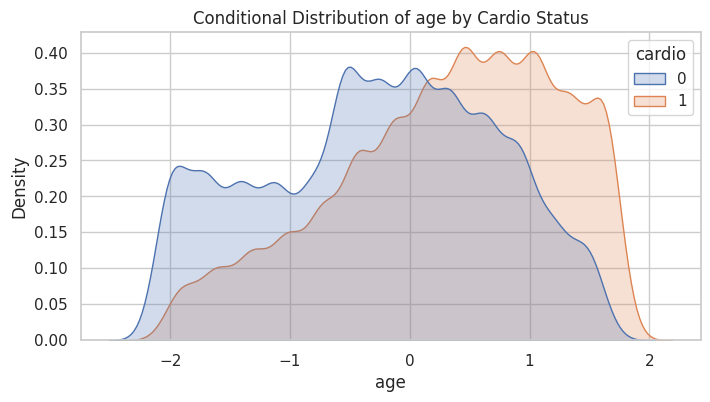

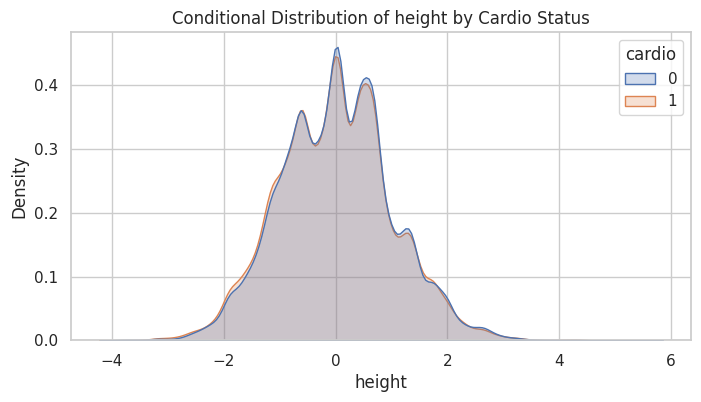

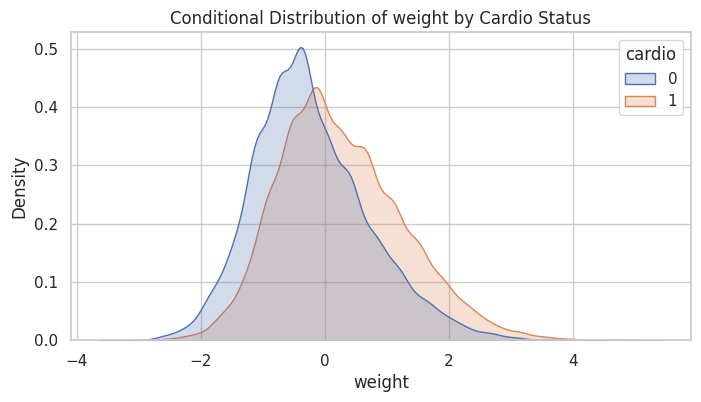

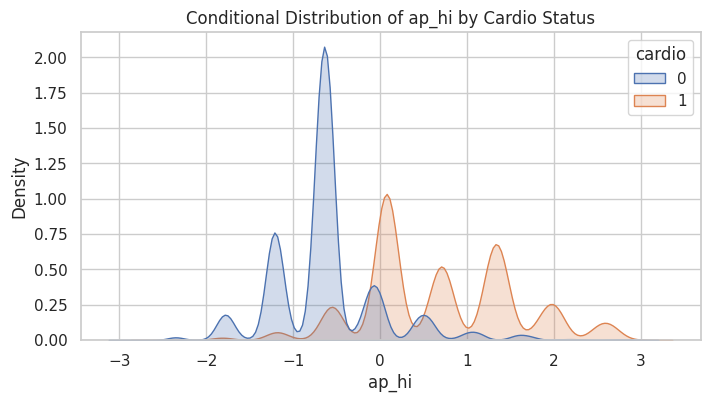

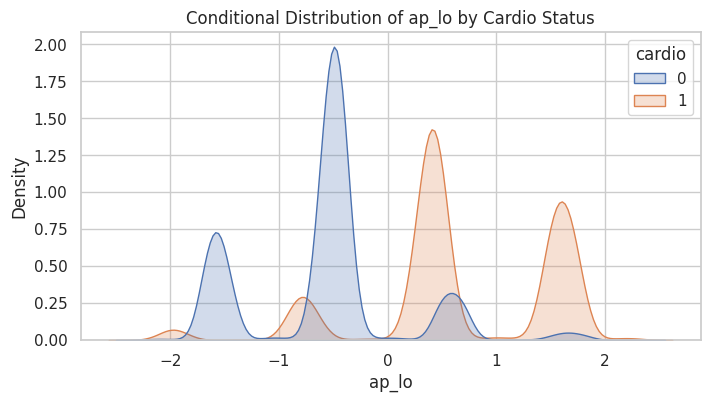

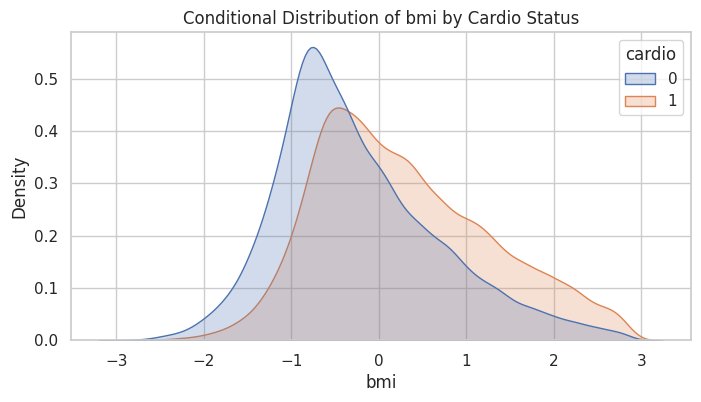

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

quant_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
# We loop through features to show their distribution "conditioned" on the target class
for col in quant_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df_standardized, x=col, hue='cardio', fill=True, common_norm=False)
    plt.title(f'Conditional Distribution of {col} by Cardio Status')
    plt.show()

--- Plotting Conditional Distributions for Categorical Features ---


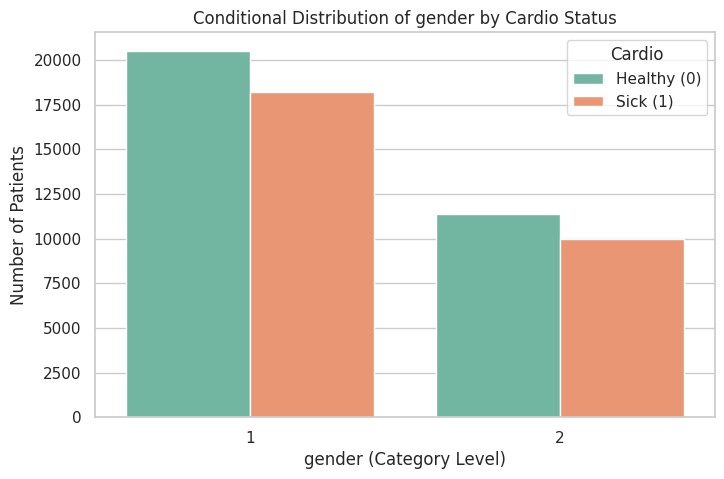

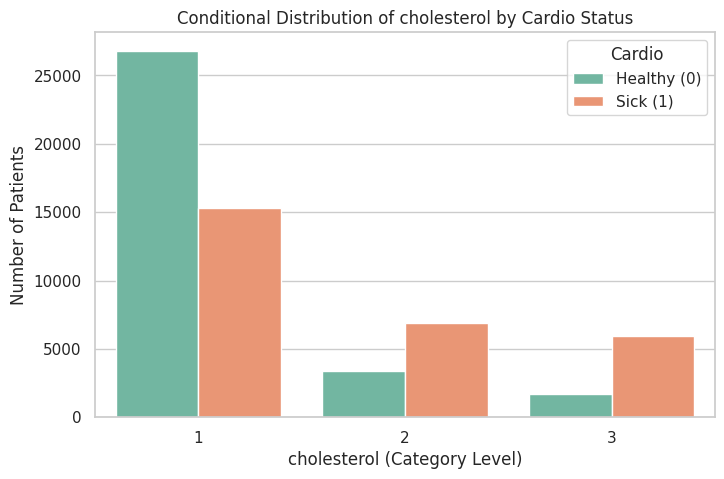

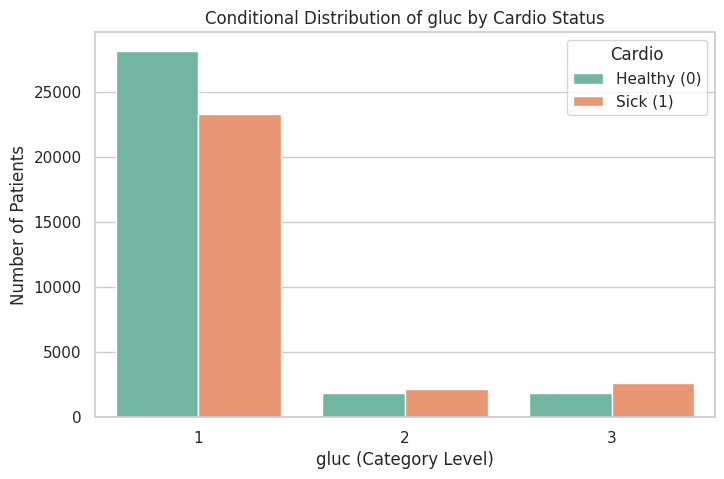

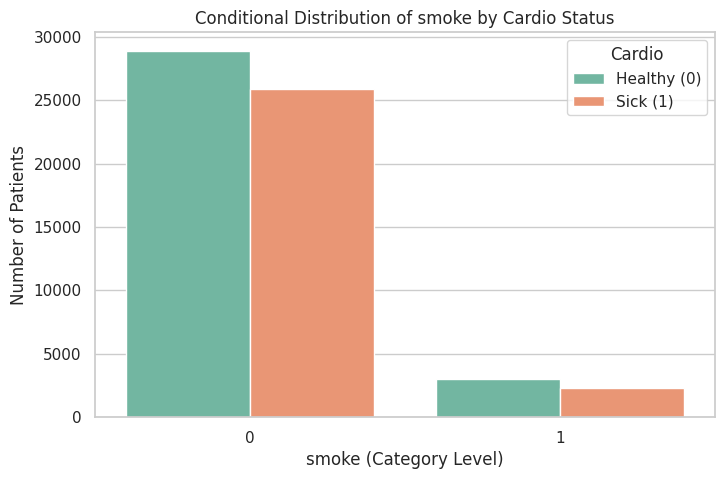

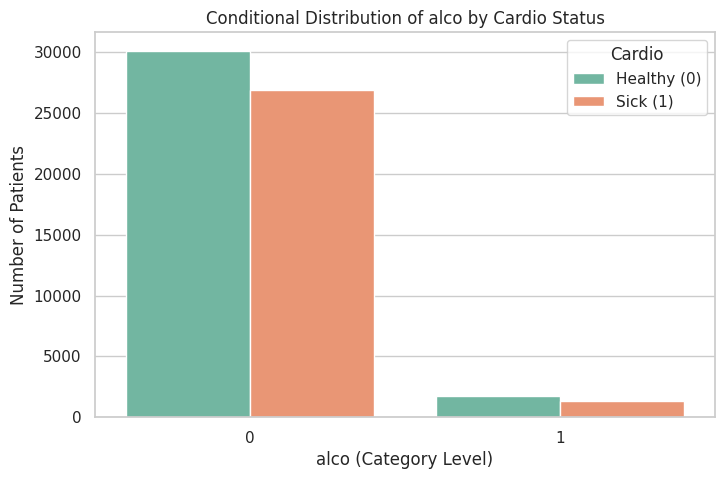

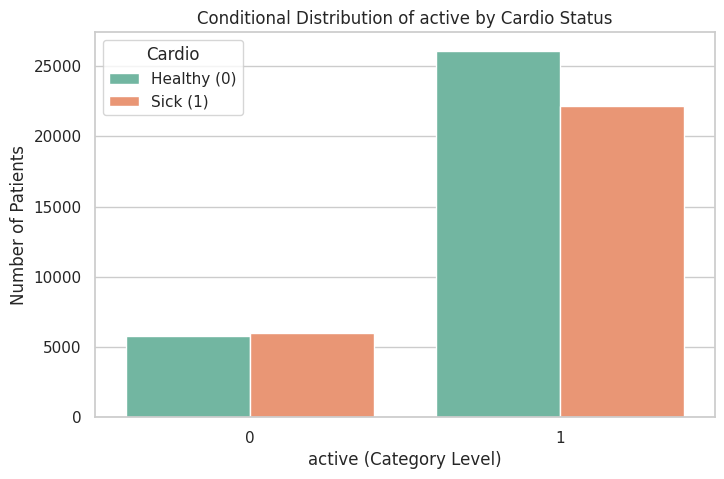

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your categorical features
cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

print("--- Plotting Conditional Distributions for Categorical Features ---")

for col in cat_features:
    plt.figure(figsize=(8, 5))

    # sns.countplot automatically shows the "conditional" distribution when we use 'hue'
    sns.countplot(x=col, hue='cardio', data=df_standardized, palette='Set2')

    plt.title(f'Conditional Distribution of {col} by Cardio Status')
    plt.xlabel(f'{col} (Category Level)')
    plt.ylabel('Number of Patients')
    plt.legend(title='Cardio', labels=['Healthy (0)', 'Sick (1)'])

    plt.show()

# Naive Bayes Classifier


# Naive Bayes Implementation Documentation

---

## 1. Theoretical Foundation

Naive Bayes is based on **Bayes' Theorem**, which calculates the probability of a class $C$ given a feature vector $x$:

$$P(C \mid x) = \frac{P(C) P(x \mid C)}{P(x)}$$

Since $P(x)$ is the same for all classes, we aim to maximize the numerator. The "Naive" assumption states that features are conditionally independent given the class:

$$P(C \mid x_1, \dots, x_n) \propto P(C) \prod_{i=1}^{n} P(x_i \mid C)$$

To prevent numerical underflow (where multiplying many small probabilities results in zero), we perform calculations in the **Log-Logit Space**:

$$\ln P(C \mid x) \propto \ln P(C) + \sum_{i=1}^{n} \ln P(x_i \mid C)$$

---

## 2. Handling Different Feature Types

The code implements two distinct likelihood models depending on the feature type.

### A. Numerical Features: Gaussian Likelihood
For continuous data (e.g., age, weight, blood pressure), we assume a **Gaussian (Normal) Distribution**:

$$P(x_i \mid C) = \frac{1}{\sqrt{2\pi\sigma^2_{C,i}}} \exp\left(-\frac{(x_i - \mu_{C,i})^2}{2\sigma^2_{C,i}}\right)$$

In the code, `gaussian_log_P` calculates the natural log of this density:
$$\text{log\_p} = -0.5 \log(2\pi\sigma^2_{C,i}) - \frac{(x_i - \mu_{C,i})^2}{2\sigma^2_{C,i}}$$

### B. Categorical Features: Multinomial with Laplace Smoothing
For discrete data (e.g., gender, smoking status), we calculate frequencies. To handle categories that might appear in the test set but were not in the training set for a specific class, we use **Laplace (Additive) Smoothing**:

$$P(x_i = v \mid C) = \frac{count(v) + 1}{N_C + d}$$

Where:
* $count(v)$: Number of times category $v$ appears in class $C$.
* $N_C$: Total number of samples in class $C$.
* $d$: Number of unique categories for that feature.

---

## 3. Core Functions Breakdown

### `fit(X, y, categorical_features)`
This function serves as the "Learning" phase. It iterates through each class and feature to pre-compute:
* **Prior Probabilities**: $P(C) = \frac{\text{samples in class } C}{\text{total samples}}$.
* **Gaussian Parameters**: Mean ($\mu$) and Variance ($\sigma^2$) for numerical columns.
* **Categorical Probabilities**: Smoothed frequency dictionaries for categorical columns.
* **Variance Smoothing**: Adds a small $\epsilon$ (`var_smoothing`) to variances to prevent division by zero.

### `predict(X, ...)`
The inference engine:
1.  Iterates through every sample in the test set.
2.  For each class, it initializes the score with $\ln(P(C))$.
3.  Adds the log-likelihoods of all numerical features.
4.  Adds the log-likelihoods of all categorical features.
5.  **Decision Rule**: Assigns the class label with the highest resulting log-probability.

---

## 4. Evaluation and Performance Metrics

The code assesses the model using a **Confusion Matrix** and classification metrics.



### Formulas:
* **Accuracy**: $\frac{TP + TN}{TP + TN + FP + FN}$ (Total correct predictions)
* **Precision**: $\frac{TP}{TP + FP}$ (Exactness: How many predicted as positive were actually positive?)
* **Recall**: $\frac{TP}{TP + FN}$ (Completeness: How many actual positives did we catch?)
* **F1-Score**: $2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ (The harmonic mean of the two)

---

## 5. Summary of Implementation Flow

1.  **Data Ingestion**: Loads CSV, drops IDs, and separates features ($X$) from target ($y$).
2.  **Training**: Fits the model parameters and saves them to a compressed NumPy file (`.npz`).
3.  **Loading**: Demonstrates how to reload a pre-trained model for inference.
4.  **Inference**: Predicts cardiovascular risk on unseen test data.
5.  **Visualization**: Uses `seaborn` and `matplotlib` to plot the confusion matrix for error analysis.

Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], dtype='object')
Model trained and saved.
Test Accuracy: 0.8381190178942988
Precision: 0.8421740754576018
F1-score: 0.8225850588342607
Confusion Matrix:
 [[5561  845]
 [1100 4509]]


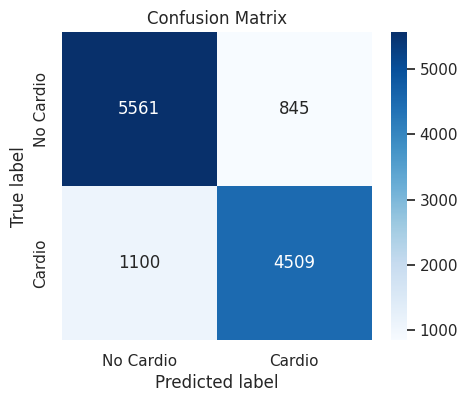

In [ ]:
import numpy as np

def fit(X, y, categorical_features, var_smoothing=1e-6):
    # x -> features
    # y -> target
    # categorical_features -> gender, cholesterol, gluc, smoke, alco, active
    """
    Fit  Naive Bayes (numerical  + categorical)
    Returns model parameters
    """
    classes = np.unique(y) # classes to predict (yes \ no)
    n_features = X.shape[1]

    # get features with numeric values
    numerical_features = []
    for i in range(n_features):
        if i not in categorical_features:
            numerical_features.append(i)


    mean = {}
    var = {}
    class_priors = {}
    cat_prob = {}

    # If a feature has very small variance (close to 0), dividing by will blow up the computation or produce infinite.
    #We add a tiny constant to the variance
    # var_smoothing determines e  as a fraction of the largest variance in the dataset
    epsilon = var_smoothing

    for c in classes:
        X_c = X[y == c]
        class_priors[c] = len(X_c) / len(X)

        # Continuous
        mean[c] = {}
        var[c] = {}
        cat_prob[c] = {}

        for f in numerical_features:
            mean[c][f] = np.mean(X_c[:, f])
            var[c][f] = np.var(X_c[:, f]) + epsilon

        # Categoricalfor f in categorical_features:
        for f in categorical_features:
            cat_prob[c][f] = {}
            values, counts = np.unique(X_c[:, f], return_counts=True)

            total = len(X_c)
            num_values = len(values)

            for v, cnt in zip(values, counts):
                cat_prob[c][f][v] = (cnt + 1) / (total + num_values)
                                # Laplace smoothing


    return classes, mean, var, cat_prob, class_priors, numerical_features

def gaussian_log_P(x, mean, var):
    return -0.5 * np.log(2 * np.pi * var) - ((x - mean) ** 2) / (2 * var)


def categorical_log_P(x, cls, categorical_features, cat_prob):
    log_p = 0.0

    for f in categorical_features:
        value = x[f]
        prob = cat_prob[cls][f].get(value, 1e-9)  # unseen value
        log_p += np.log(prob)
    return log_p

def predict(X, classes, mean, var, cat_prob, class_priors,
            numerical_features, categorical_features):

    predictions = []

    for x in X:
        class_scores = {}

        for cls in classes:
            log_prob = np.log(class_priors[cls])

            # numerical features
            for f in numerical_features:
                log_prob += gaussian_log_P(x[f], mean[cls][f], var[cls][f])

            # categorical features
            log_prob += categorical_log_P(
                x, cls, categorical_features, cat_prob
            )

            class_scores[cls] = log_prob

        # choose class with max probability
        predictions.append(max(class_scores, key=class_scores.get))

    return np.array(predictions)

def score(y_true, y_pred):
    return np.mean(y_true == y_pred)
def precision_f1(y_true, y_pred, positive_class=1):
    tp = 0
    fp = 0
    fn = 0

    for yt, yp in zip(y_true, y_pred):
        if yp == positive_class and yt == positive_class:
            tp += 1
        elif yp == positive_class and yt != positive_class:
            fp += 1
        elif yp != positive_class and yt == positive_class:
            fn += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    f1 = (
        2 * precision * recall / (precision + recall)
        if (precision + recall) > 0
        else 0.0
    )
    return precision, f1

import numpy as np

def confusion_matrix_binary(y_true, y_pred, positive_class=1):
    tp = fp = tn = fn = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == positive_class and yp == positive_class:
            tp += 1
        elif yt != positive_class and yp == positive_class:
            fp += 1
        elif yt == positive_class and yp != positive_class:
            fn += 1
        else:
            tn += 1

    return np.array([[tn, fp],
                    [fn, tp]])

def plot_confusion_matrix(cm, classes=["0", "1"], title="Confusion Matrix"):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)
    plt.show()

import pandas as pd
import numpy as np

#  LOAD TRAIN DATA
train_df = pd.read_csv("/content/drive/MyDrive/train_data.csv")
train_df = train_df.drop(columns=["id"])
X_train = train_df.drop(columns=["cardio"]).values
y_train = train_df["cardio"].values

categorical_features = [1, 6, 7, 8, 9, 10]

categorical_columns = train_df.columns[categorical_features]
print(categorical_columns)

#  TRAIN
classes, mean, var, cat_prob, class_priors, numerical_features = fit(
    X_train,
    y_train,
    categorical_features
)

#  SAVE MODEL
np.savez(
    "naive_bayes_model.npz",
    classes=classes,
    mean=mean,
    var=var,
    cat_prob=cat_prob,
    class_priors=class_priors,
    numerical_features=numerical_features,
    categorical_features=categorical_features
)

print("Model trained and saved.")
import pandas as pd
import numpy as np

#  LOAD MODEL
model = np.load("naive_bayes_model.npz", allow_pickle=True)

classes = model["classes"]
mean = model["mean"].item()
var = model["var"].item()
cat_prob = model["cat_prob"].item()
class_priors = model["class_priors"].item()
numerical_features = model["numerical_features"].tolist()
categorical_features = model["categorical_features"].tolist()

#  LOAD TEST DATA
test_df = pd.read_csv("/content/drive/MyDrive/test_data.csv")
test_df = test_df.drop(columns=["id"])

X_test = test_df.drop(columns=["cardio"]).values
y_test = test_df["cardio"].values

#  PREDICT
y_pred = predict(
    X_test,
    classes,
    mean,
    var,
    cat_prob,
    class_priors,
    numerical_features,
    categorical_features
)

print("Test Accuracy:", score(y_test, y_pred))

precision, f1 = precision_f1(y_test, y_pred)

print("Precision:", precision)
print("F1-score:", f1)
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix_binary(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plot_confusion_matrix(cm, classes=["No Cardio", "Cardio"])




HYBRID NAIVE BAYES CLASSIFIER (GaussianNB + CategoricalNB)

[1] Loading data...
Training set: 48056 samples
Test set: 12015 samples

[2] Defining feature types...
Continuous features: ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
Categorical features: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

[3] Preparing data...
Continuous features shape: (48056, 6)
Categorical features shape: (48056, 6)

[4] Training Gaussian Naive Bayes on continuous features...
GaussianNB trained successfully
Classes: [0 1]

[5] Training Categorical Naive Bayes on categorical features...
CategoricalNB trained successfully
Classes: [0 1]

[6] Combining probabilities from both models...
Combined log probabilities computed
Shape: (12015, 2)

[7] Making predictions...
Predictions completed

[8] Evaluating Hybrid Naive Bayes model...

Hybrid Naive Bayes Results:
  Accuracy: 0.8381 (83.81%)

Confusion Matrix:
                 Predicted
                 No   Yes
Actual No    [ 5561   845]
Actua

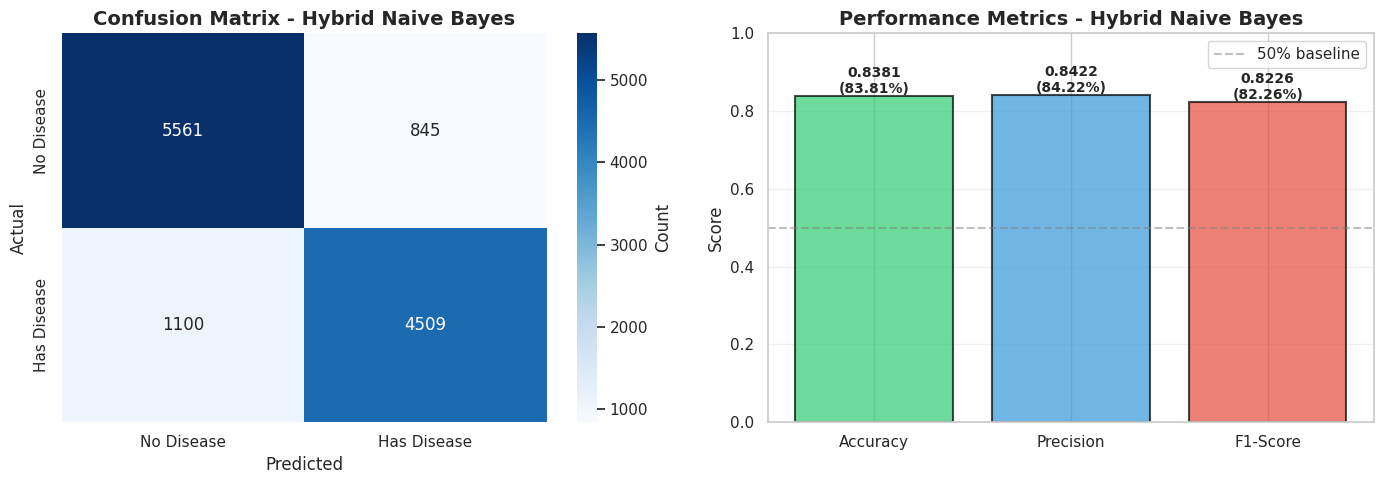

In [ ]:
"""
Hybrid Naive Bayes Classifier using scikit-learn
================================================
This implementation combines GaussianNB (for continuous features) and
CategoricalNB (for categorical features) by manually computing and
combining their class conditional probabilities.

Author: ML Engineer
Date: 2025
"""

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("HYBRID NAIVE BAYES CLASSIFIER (GaussianNB + CategoricalNB)")
print("="*70)

# ============================================================================
# STEP 1: LOAD DATA
# ============================================================================
print("\n[1] Loading data...")
train_data = pd.read_csv('/content/drive/MyDrive/train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')

print(f"Training set: {train_data.shape[0]} samples")
print(f"Test set: {test_data.shape[0]} samples")

# ============================================================================
# STEP 2: DEFINE FEATURE TYPES
# ============================================================================
print("\n[2] Defining feature types...")

# Continuous features (will use GaussianNB)
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# Categorical features (will use CategoricalNB)
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

print(f"Continuous features: {continuous_features}")
print(f"Categorical features: {categorical_features}")

# ============================================================================
# STEP 3: PREPARE DATA
# ============================================================================
print("\n[3] Preparing data...")

# Separate features and target
X_train_full = train_data.drop(['id', 'cardio'], axis=1)
y_train = train_data['cardio'].values

X_test_full = test_data.drop(['id', 'cardio'], axis=1)
y_test = test_data['cardio'].values

# Extract continuous features for GaussianNB
X_train_continuous = X_train_full[continuous_features].values
X_test_continuous = X_test_full[continuous_features].values

# Extract categorical features for CategoricalNB
# CategoricalNB requires non-negative integers
X_train_categorical = X_train_full[categorical_features].values
X_test_categorical = X_test_full[categorical_features].values

# Ensure categorical features are non-negative integers
# Add offset if there are negative values
for i in range(X_train_categorical.shape[1]):
    min_val = X_train_categorical[:, i].min()
    if min_val < 0:
        X_train_categorical[:, i] = X_train_categorical[:, i] - min_val
        X_test_categorical[:, i] = X_test_categorical[:, i] - min_val

# Convert to integers
X_train_categorical = X_train_categorical.astype(int)
X_test_categorical = X_test_categorical.astype(int)

print(f"Continuous features shape: {X_train_continuous.shape}")
print(f"Categorical features shape: {X_train_categorical.shape}")

# ============================================================================
# STEP 4: TRAIN GAUSSIAN NB (for continuous features)
# ============================================================================
print("\n[4] Training Gaussian Naive Bayes on continuous features...")

# Initialize and train GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_continuous, y_train)

# Get log probabilities for test set
# log P(continuous features | class)
log_prob_continuous = gaussian_nb.predict_log_proba(X_test_continuous)

print(f"GaussianNB trained successfully")
print(f"Classes: {gaussian_nb.classes_}")

# ============================================================================
# STEP 5: TRAIN CATEGORICAL NB (for categorical features)
# ============================================================================
print("\n[5] Training Categorical Naive Bayes on categorical features...")

# Initialize and train CategoricalNB
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train_categorical, y_train)

# Get log probabilities for test set
# log P(categorical features | class)
log_prob_categorical = categorical_nb.predict_log_proba(X_test_categorical)

print(f"CategoricalNB trained successfully")
print(f"Classes: {categorical_nb.classes_}")

# ============================================================================
# STEP 6: COMBINE PROBABILITIES (Hybrid Approach)
# ============================================================================
print("\n[6] Combining probabilities from both models...")

"""
According to Naive Bayes assumption:
P(y | x_continuous, x_categorical) ∝ P(y) * P(x_continuous | y) * P(x_categorical | y)

In log space:
log P(y | x) = log P(y) + log P(x_continuous | y) + log P(x_categorical | y)

We already have:
- log P(x_continuous | y) from GaussianNB
- log P(x_categorical | y) from CategoricalNB

We need to add the class priors log P(y)
"""

# Get class priors (log probabilities)
# Both models should have the same class priors, we'll use GaussianNB's
log_class_priors = np.log(gaussian_nb.class_prior_)

# Combine log probabilities
# Shape: (n_samples, n_classes)
log_prob_combined = log_prob_continuous + log_prob_categorical

# Note: The predict_log_proba already includes class priors, so we need to be careful
# Actually, predict_log_proba returns log P(y|x), not log P(x|y)
# Let's recalculate properly

# Get class log priors from training data
class_counts = np.bincount(y_train)
class_priors = class_counts / len(y_train)
log_priors = np.log(class_priors)

# For GaussianNB, we need log P(x|y), not log P(y|x)
# We can use _joint_log_likelihood which gives log P(x,y) = log P(y) + log P(x|y)
log_likelihood_continuous = gaussian_nb._joint_log_likelihood(X_test_continuous)
log_likelihood_categorical = categorical_nb._joint_log_likelihood(X_test_categorical)

# Combine: log P(x_cont, x_cat, y) = log P(y) + log P(x_cont|y) + log P(x_cat|y)
# Since both _joint_log_likelihood include log P(y), we need to subtract one
log_combined = log_likelihood_continuous + log_likelihood_categorical - log_priors

print("Combined log probabilities computed")
print(f"Shape: {log_combined.shape}")

# ============================================================================
# STEP 7: MAKE PREDICTIONS
# ============================================================================
print("\n[7] Making predictions...")

# Predict class with maximum posterior probability
y_pred_hybrid = np.argmax(log_combined, axis=1)

# Convert from class indices to actual class labels
y_pred_hybrid = gaussian_nb.classes_[y_pred_hybrid]

print("Predictions completed")

# ============================================================================
# STEP 8: EVALUATE HYBRID MODEL
# ============================================================================
print("\n[8] Evaluating Hybrid Naive Bayes model...")
print("="*70)

# Calculate accuracy
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)

print(f"\nHybrid Naive Bayes Results:")
print(f"  Accuracy: {accuracy_hybrid:.4f} ({accuracy_hybrid*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_hybrid)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 No   Yes")
print(f"Actual No    [{cm[0][0]:5d} {cm[0][1]:5d}]")
print(f"Actual Yes   [{cm[1][0]:5d} {cm[1][1]:5d}]")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hybrid,
                           target_names=['No Disease', 'Has Disease']))

# Calculate precision and F1 score for plotting
precision_hybrid = precision_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid)

# ============================================================================
# VISUALIZATION: CONFUSION MATRIX AND METRICS
# ============================================================================
print("\n[Visualization] Creating plots...")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'],
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Hybrid Naive Bayes', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Plot 2: Metrics Histogram (Accuracy, Precision, F1)
metrics_names = ['Accuracy', 'Precision', 'F1-Score']
metrics_values = [accuracy_hybrid, precision_hybrid, f1_hybrid]
colors = ['#2ecc71', '#3498db', '#e74c3c']

bars = axes[1].bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_title('Performance Metrics - Hybrid Naive Bayes', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_ylim([0, 1])
axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='50% baseline')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.4f}\n({value*100:.2f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[1].legend()

plt.tight_layout()
plt.savefig('hybrid_sklearn_evaluation_plots.png', dpi=300, bbox_inches='tight')
plt.show()